# TIMIT Gestures Statistics

## Load Db and Calculate Gestures

In [2]:
import timit_stats as tist
import gesture as ges
import os
import matplotlib.pyplot as plt

%pylab inline

trans_dir = "../USC-TIMIT/EMA/Data/M1/trans"
mat_dir = "../USC-TIMIT/EMA/Data/M1/mat"

gestures = {}

for fname in os.listdir(trans_dir):
    fname = os.path.splitext(fname)[0]
    t_fname = os.path.join(trans_dir, fname + ".trans")
    mat_fname = os.path.join(mat_dir, fname + ".mat")
    gest = tist.calc_gestures(mat_fname, t_fname)
    for g in gest:
        if g not in gestures:
            gestures[g] = ges.Gesture(g)
        gestures[g].extend(gest[g])
print "gestures calculation finished"

Populating the interactive namespace from numpy and matplotlib
gestures calculation finished


## Plot Gestures

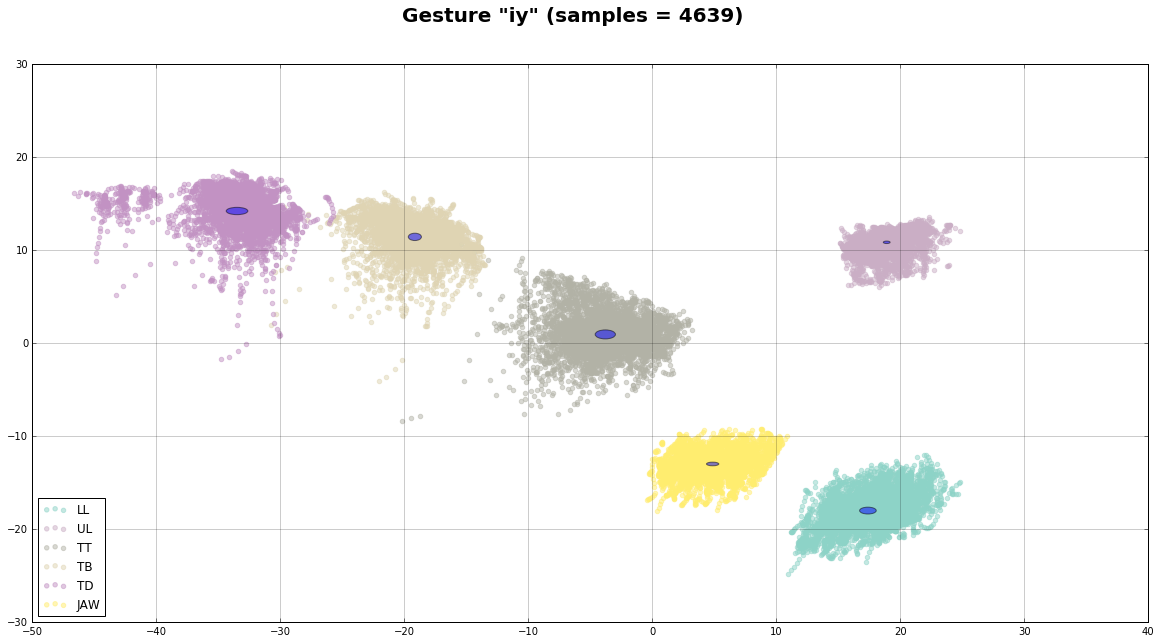

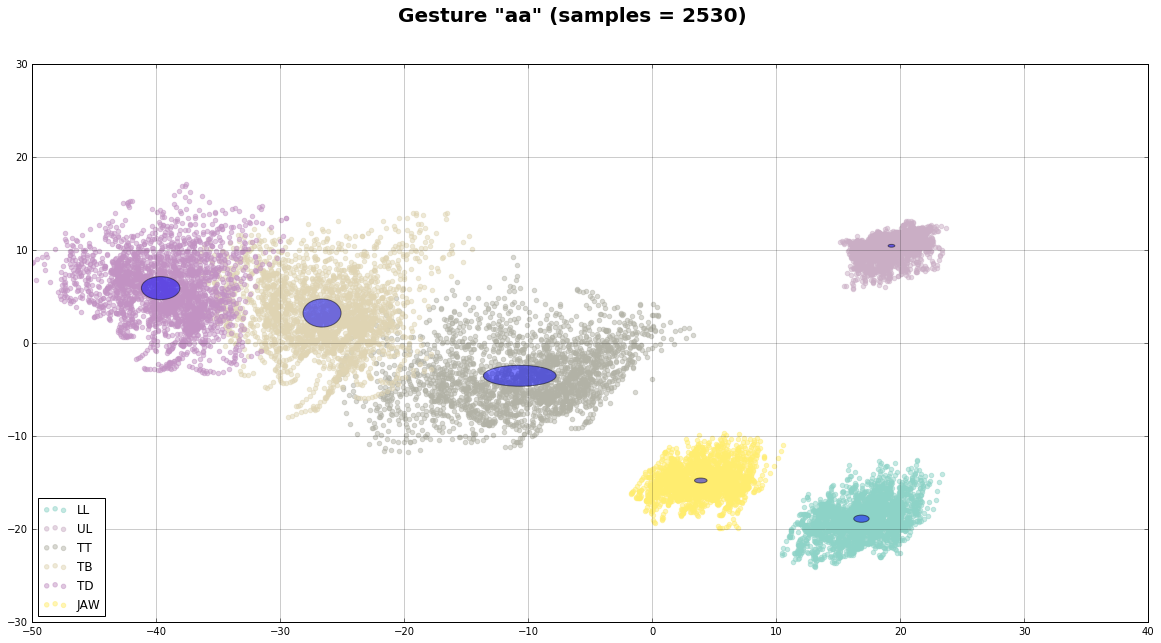

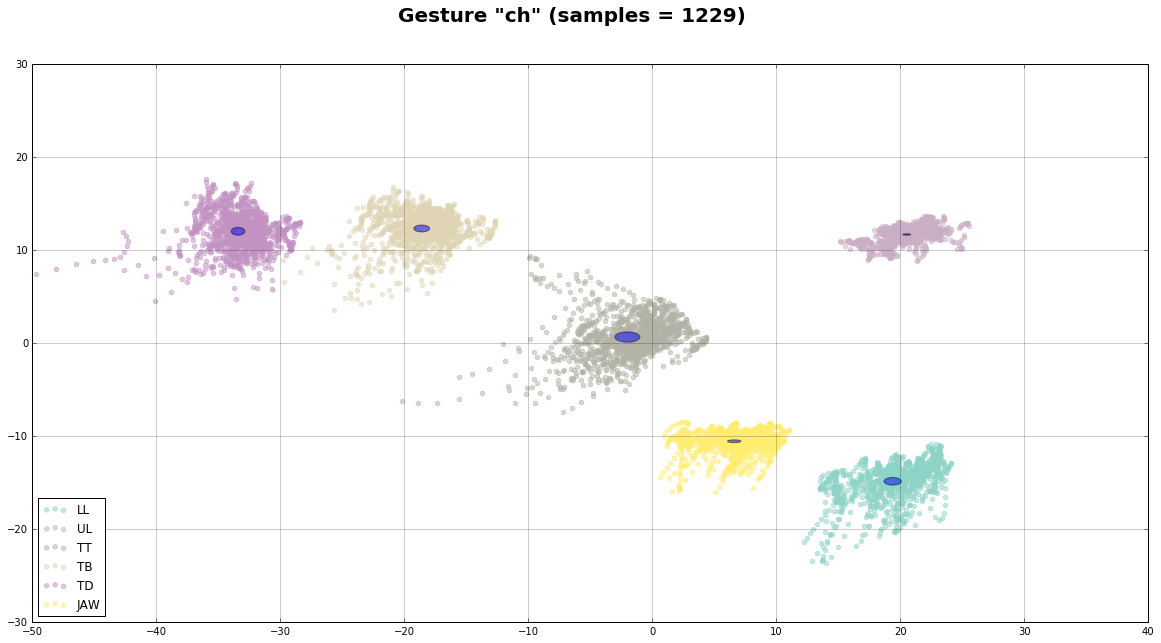

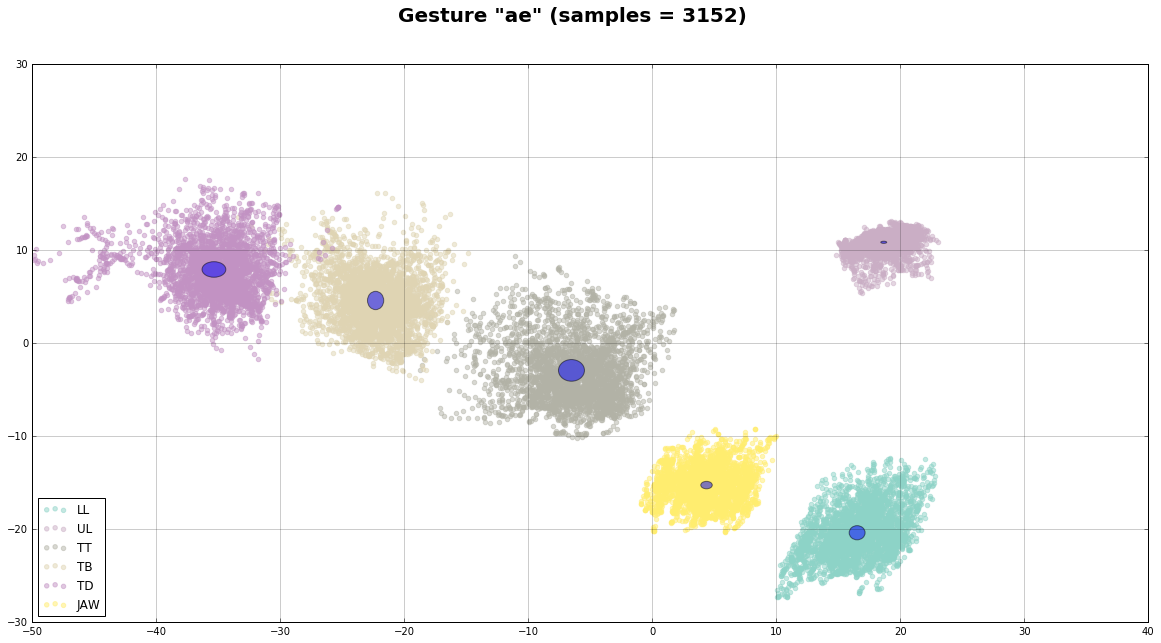

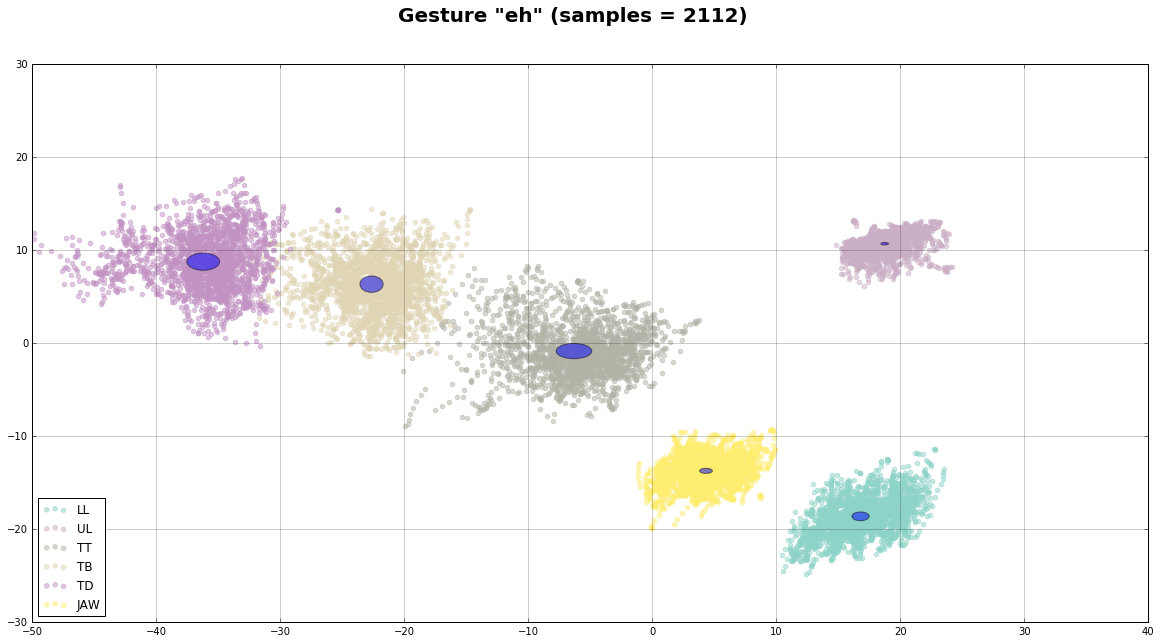

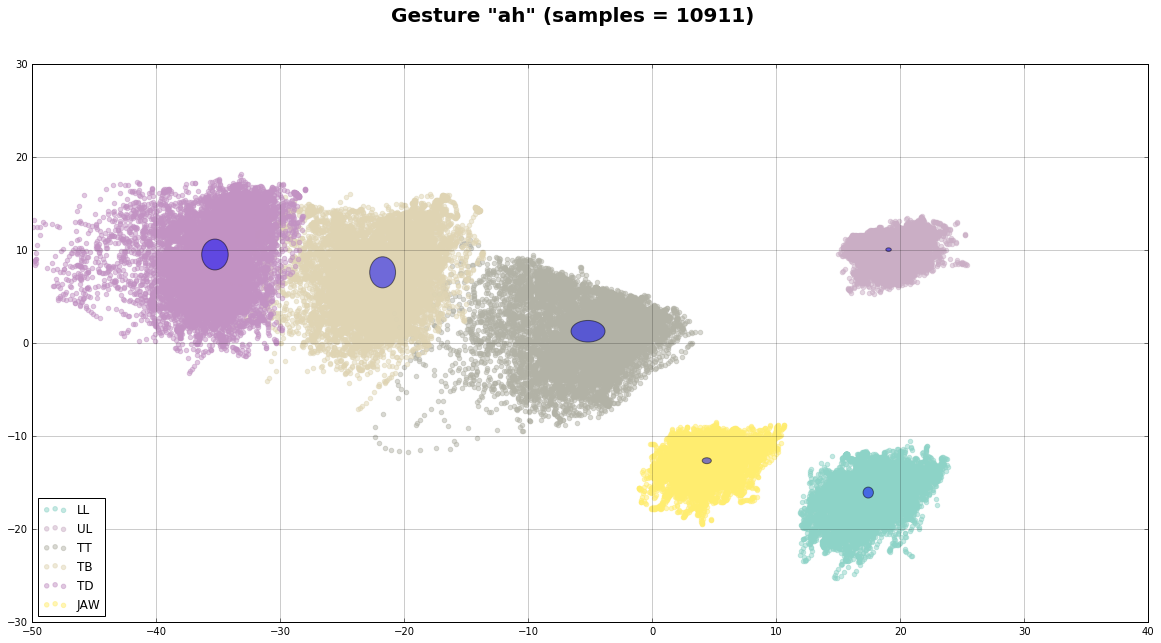

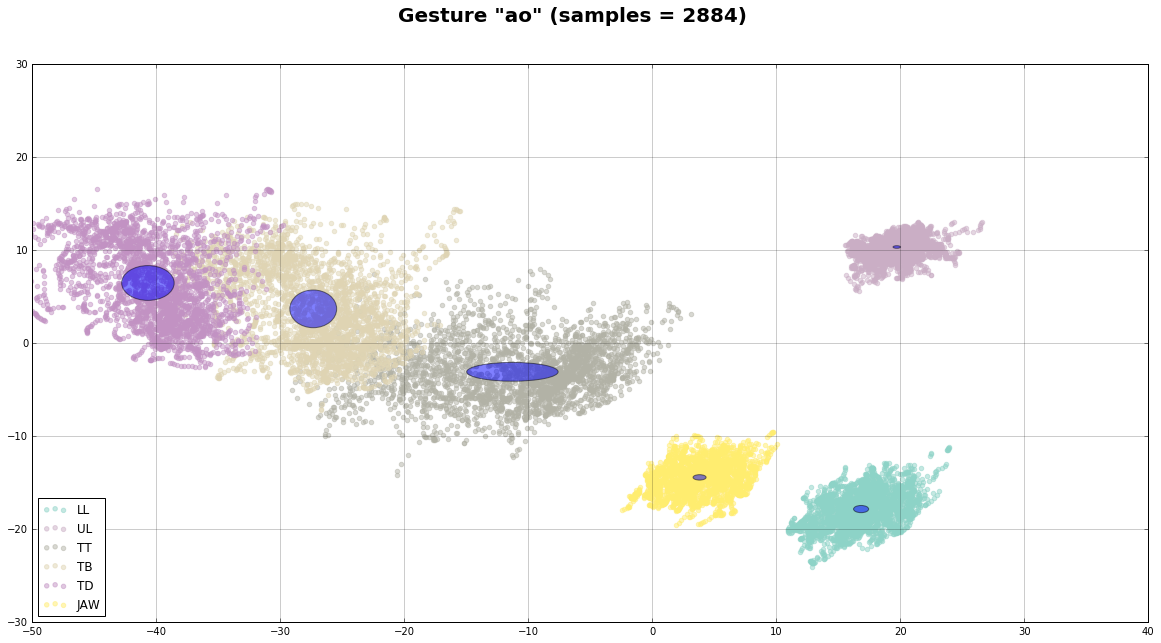

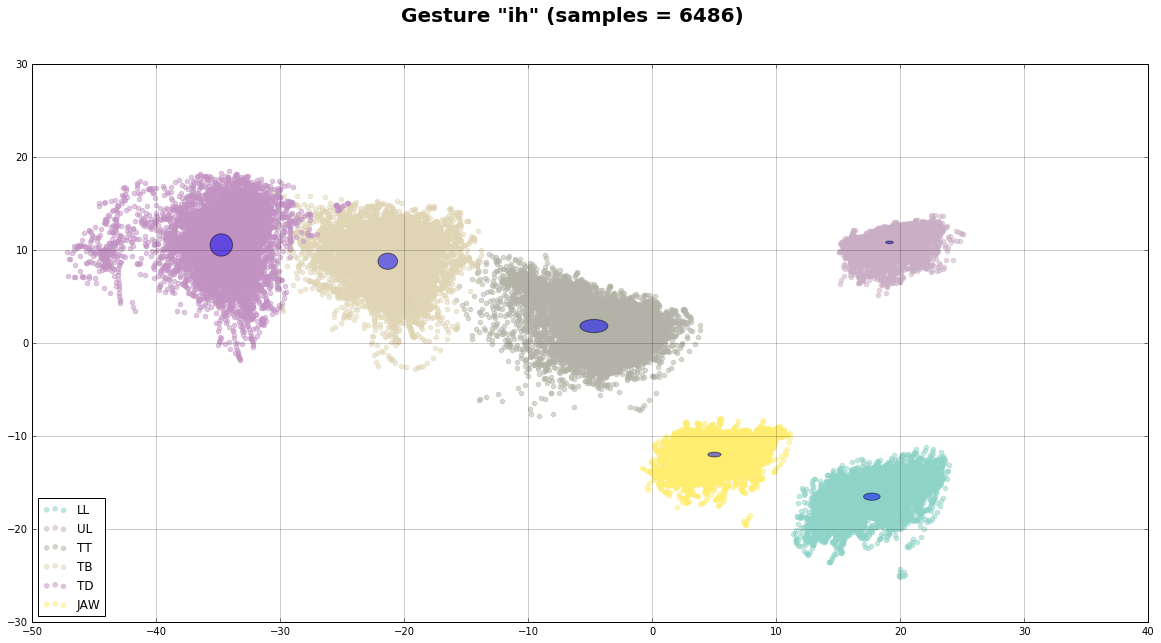

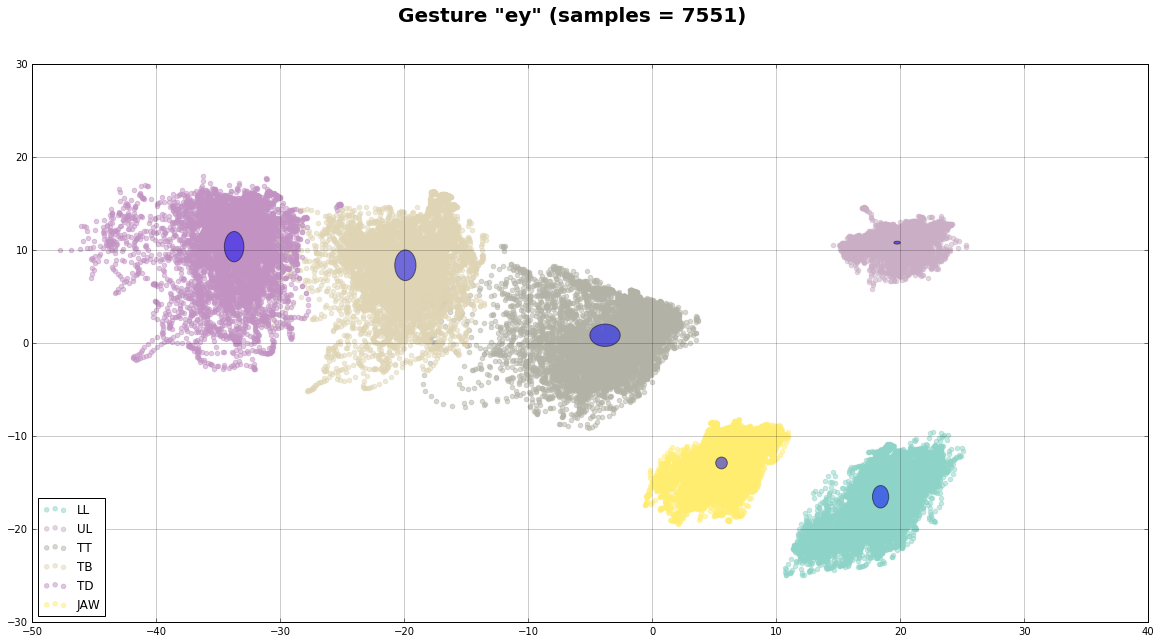

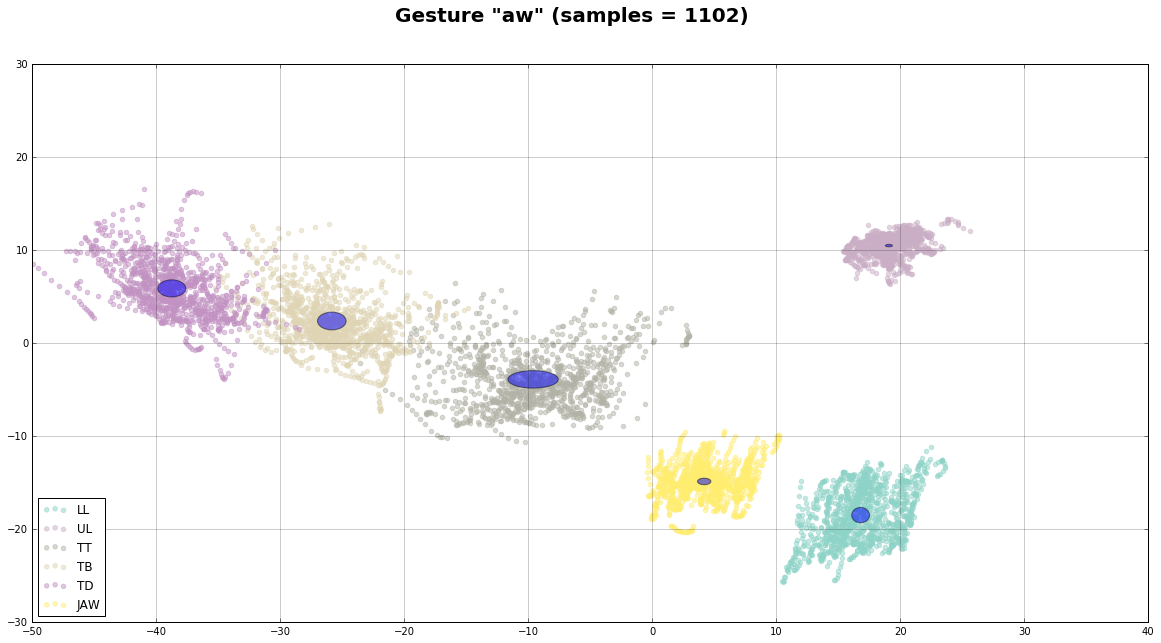

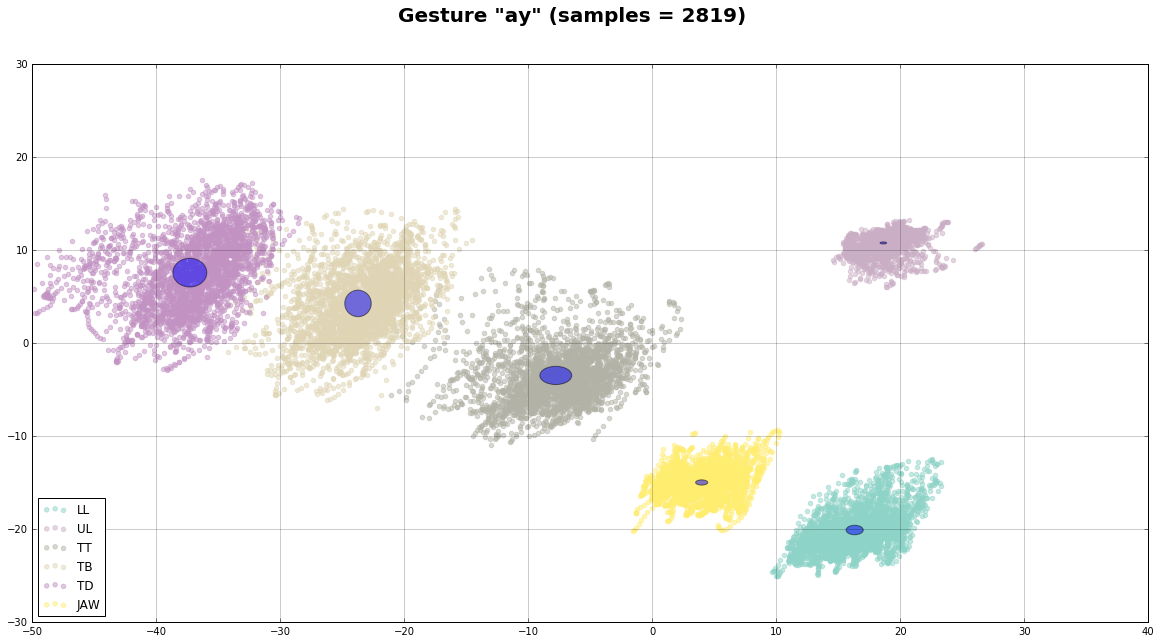

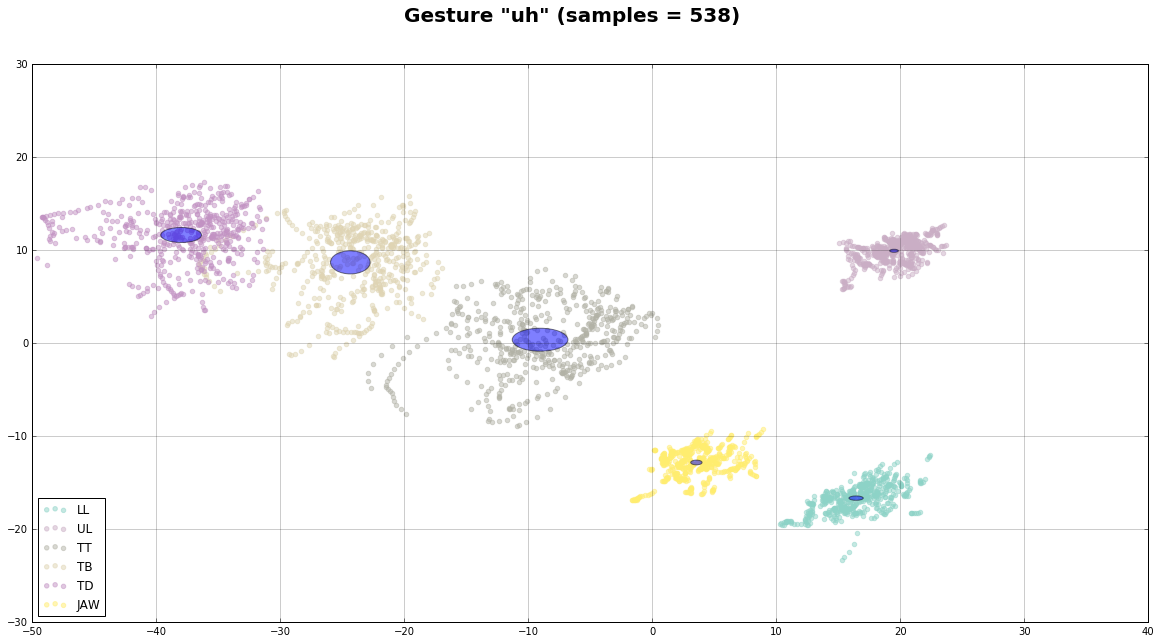

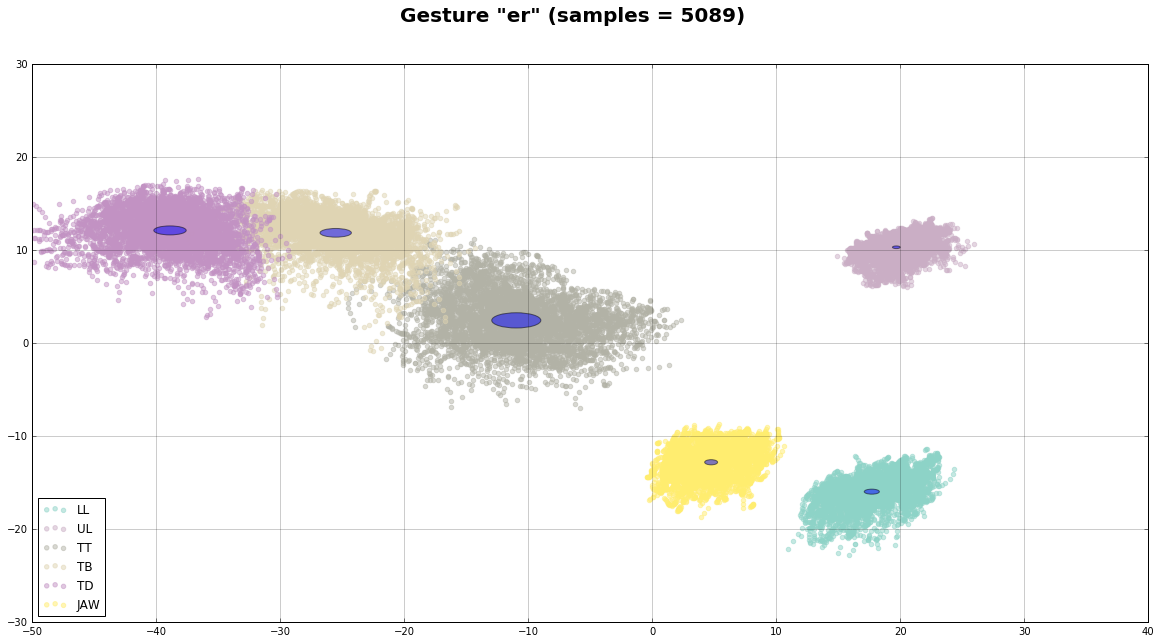

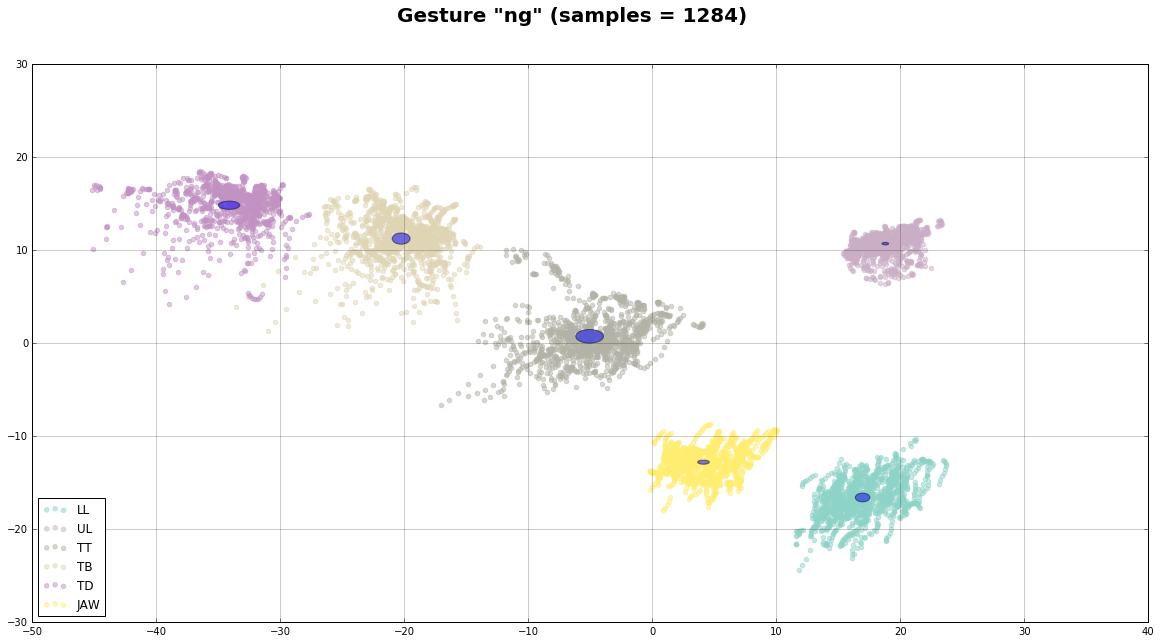

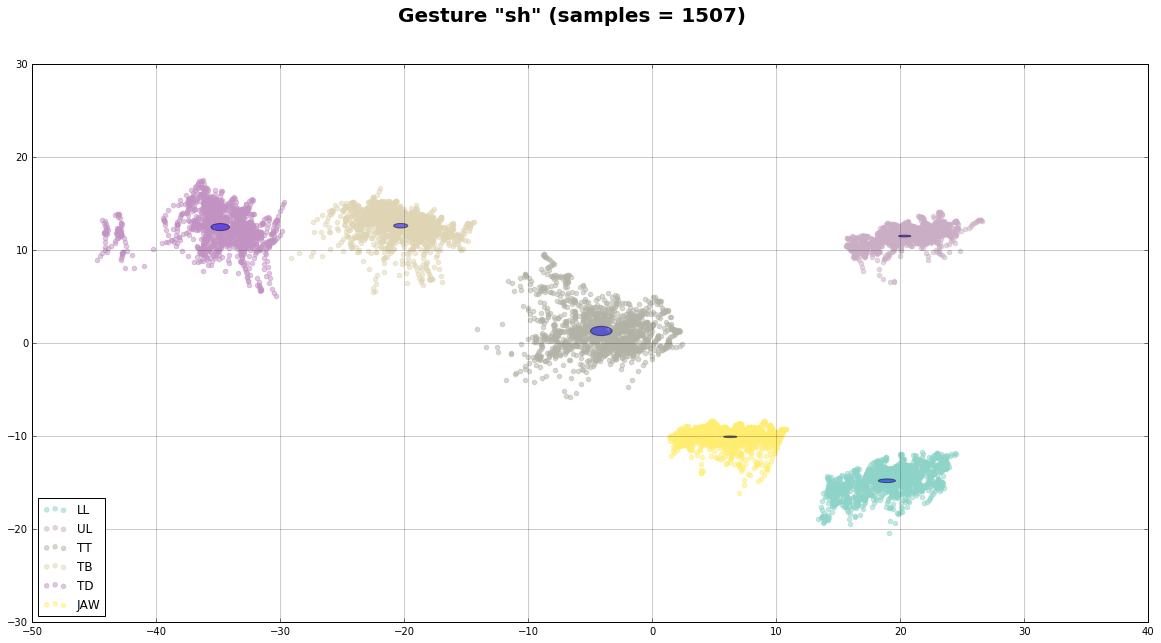

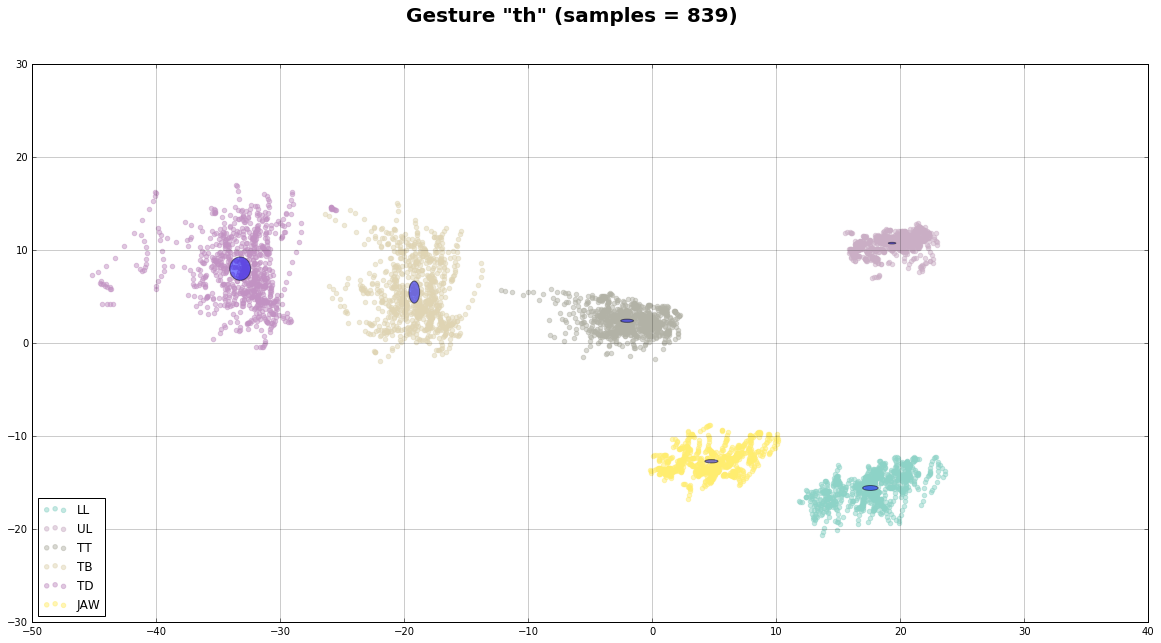

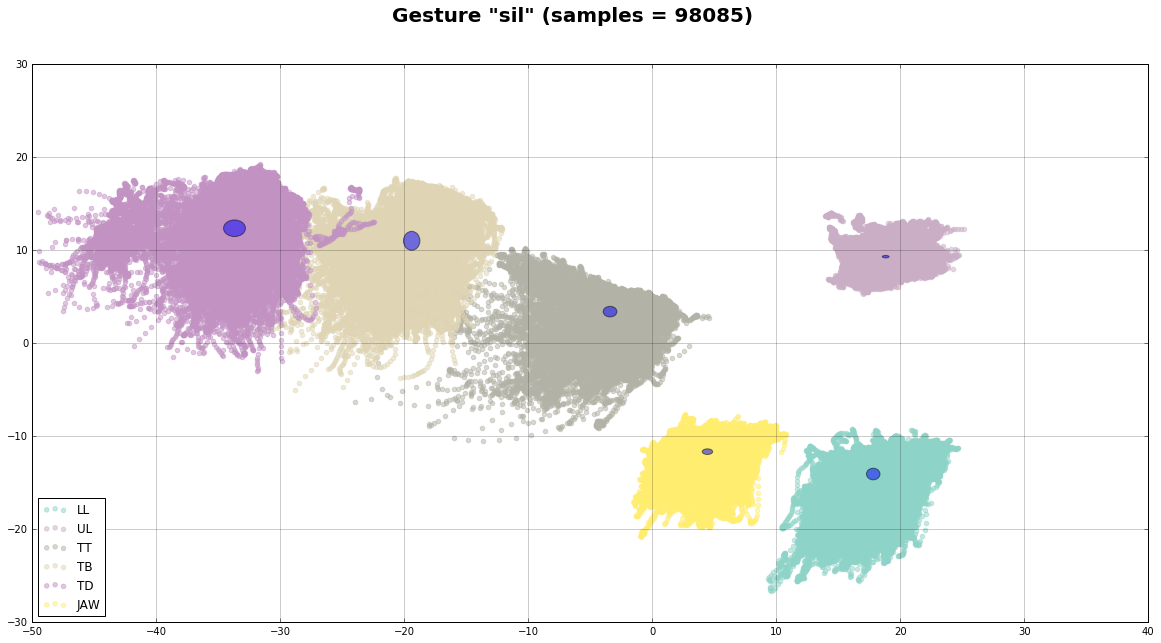

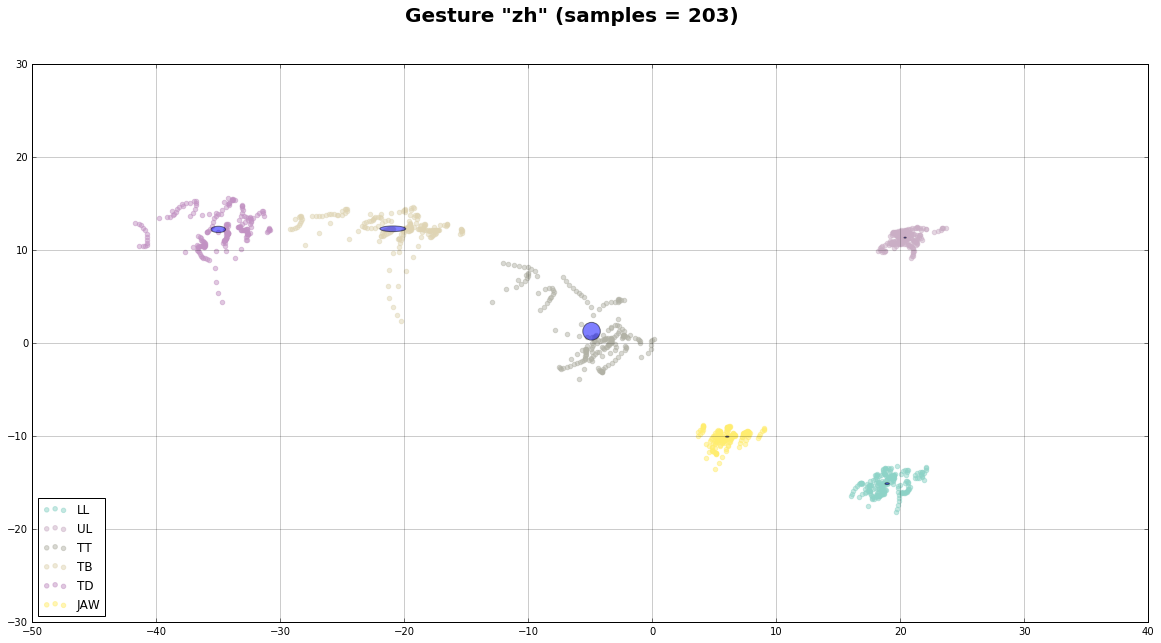

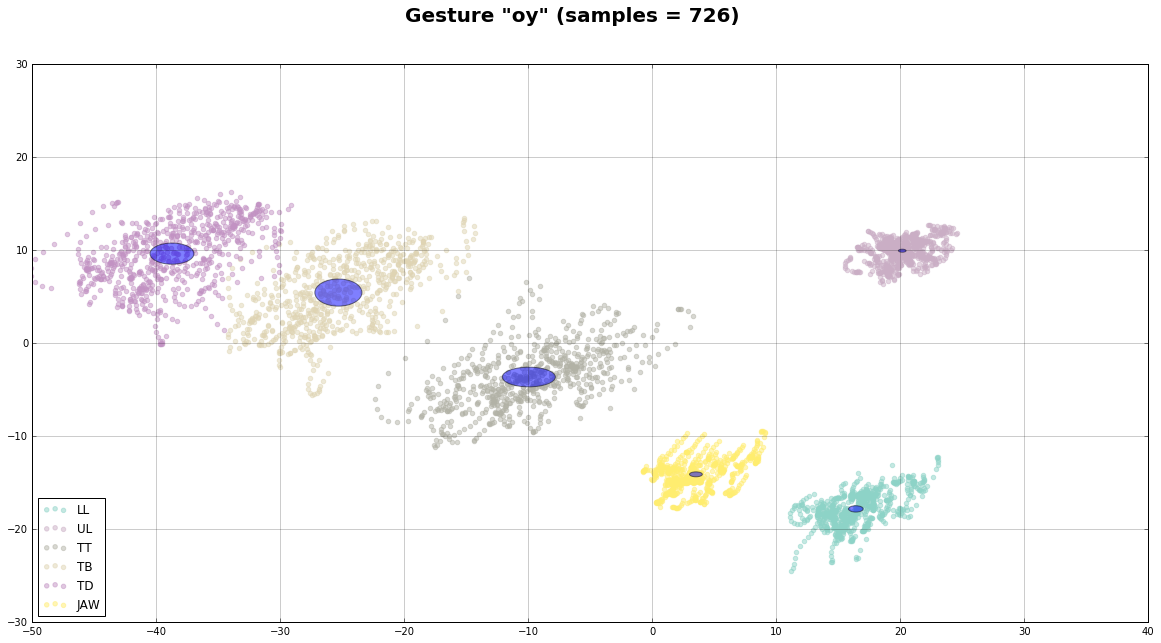

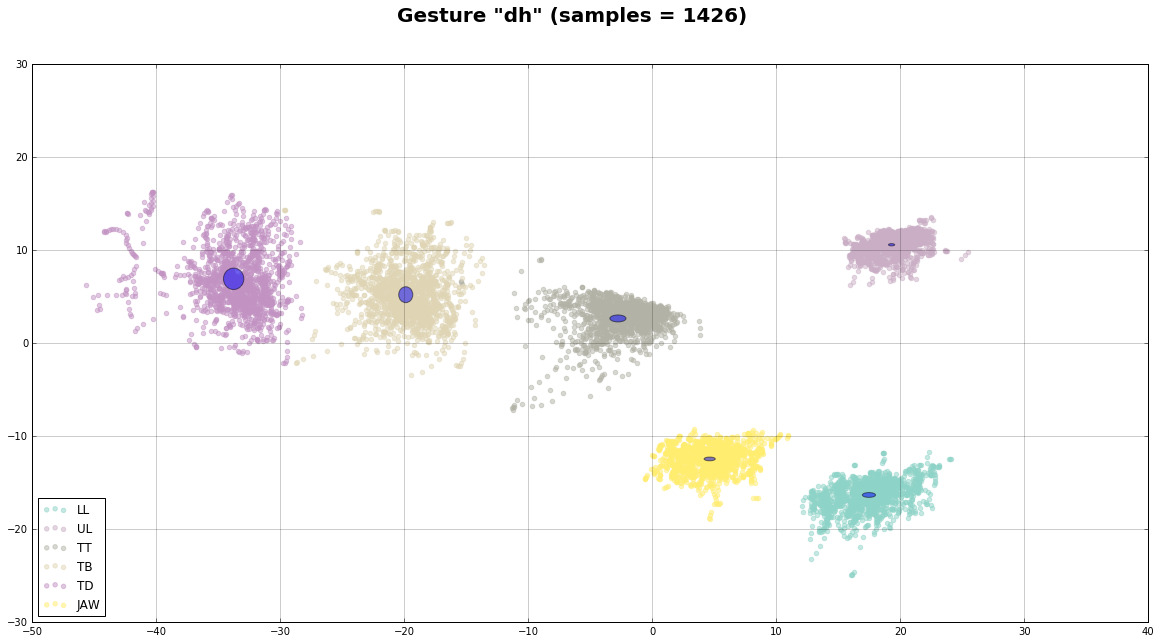

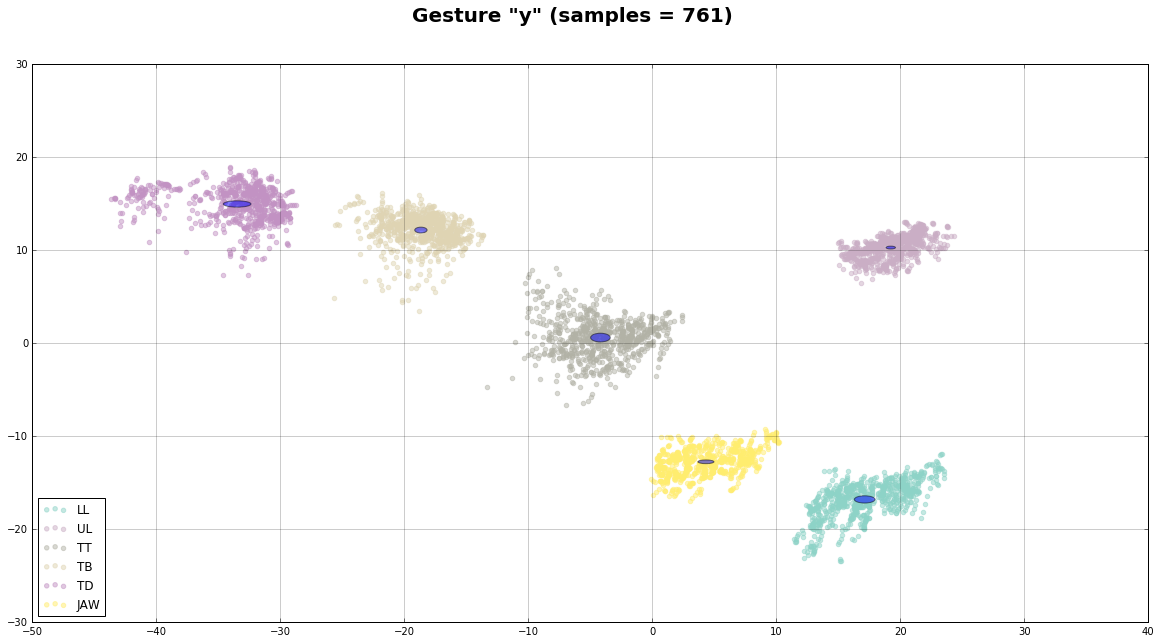

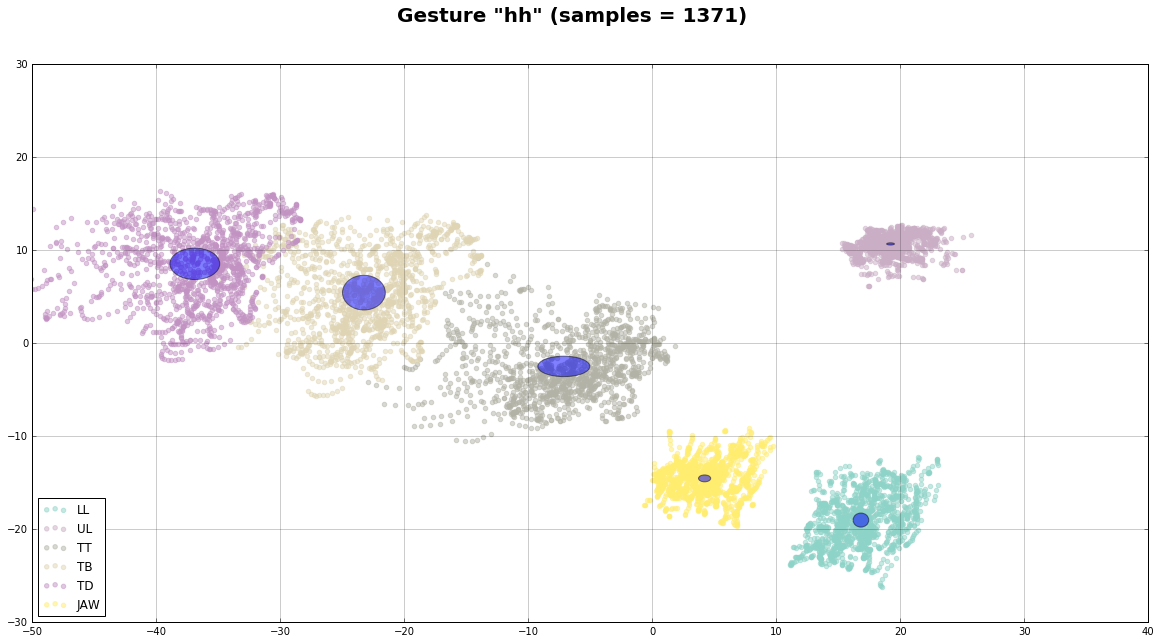

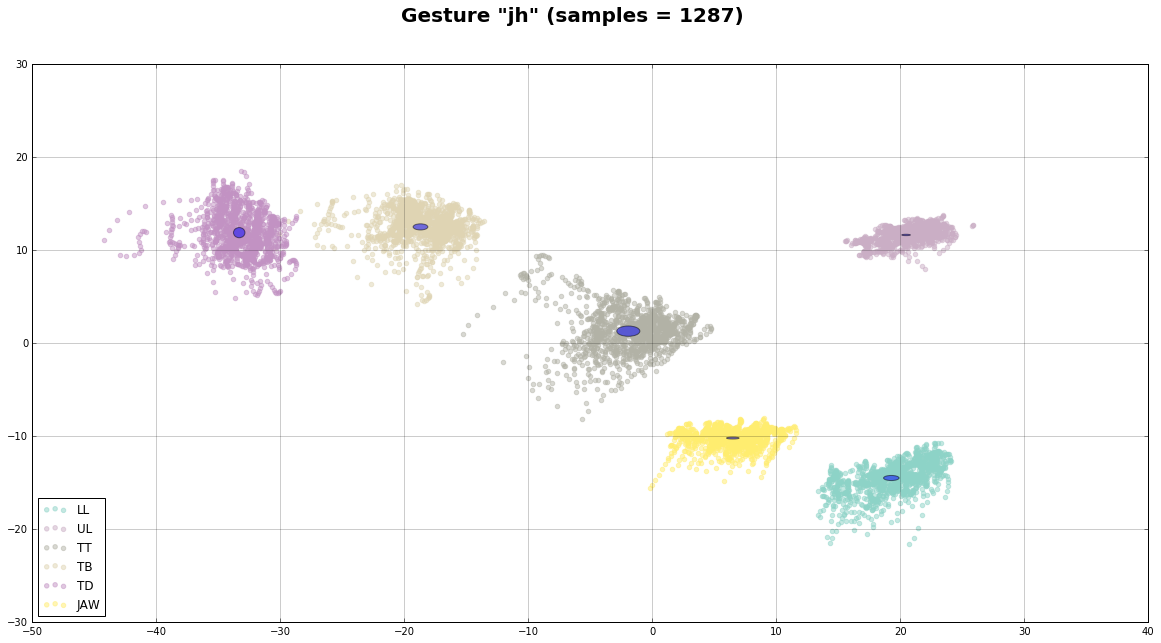

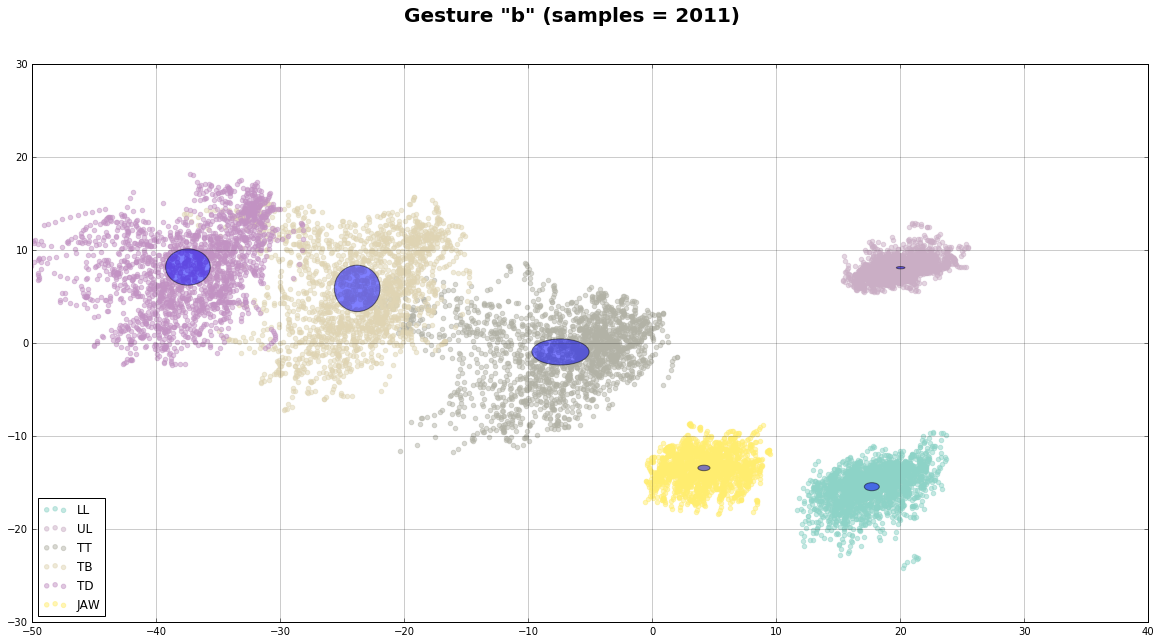

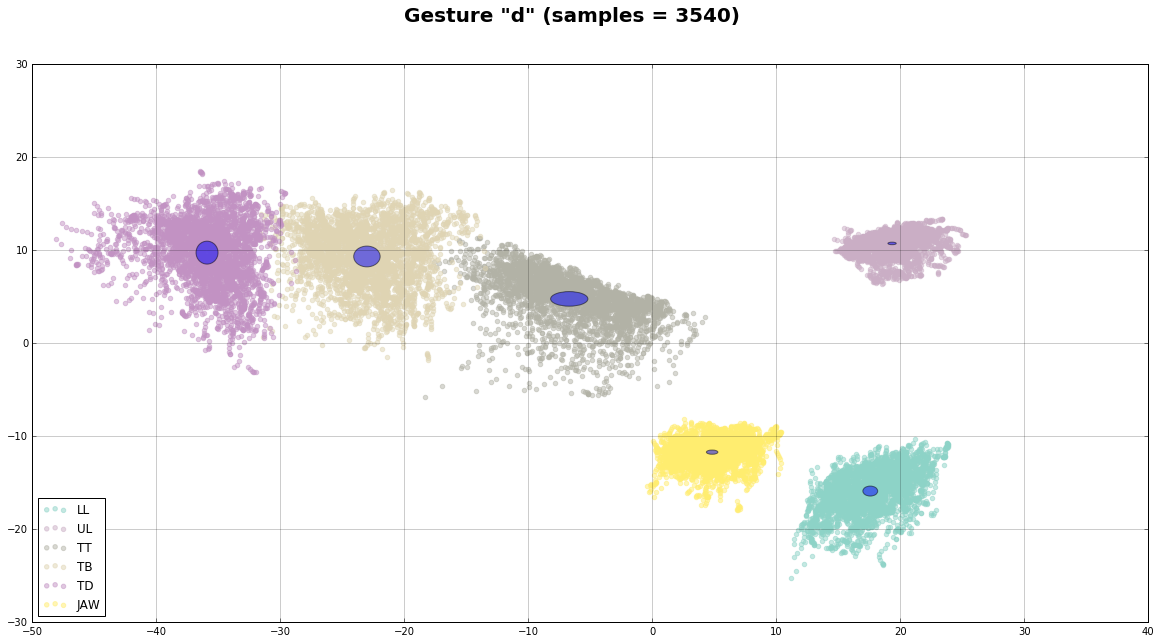

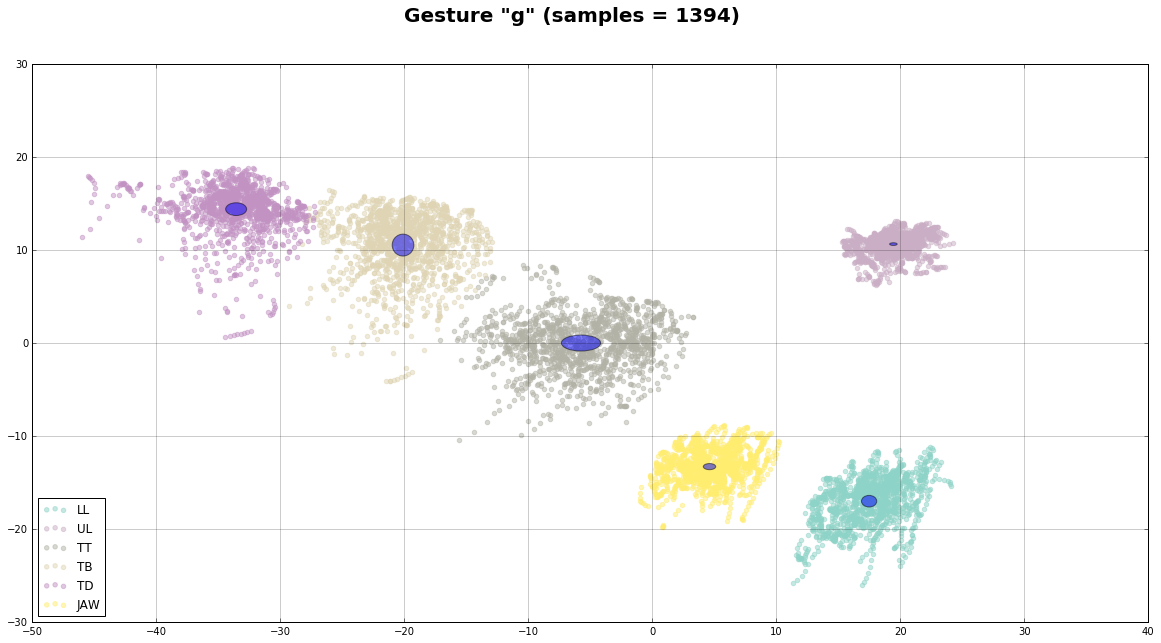

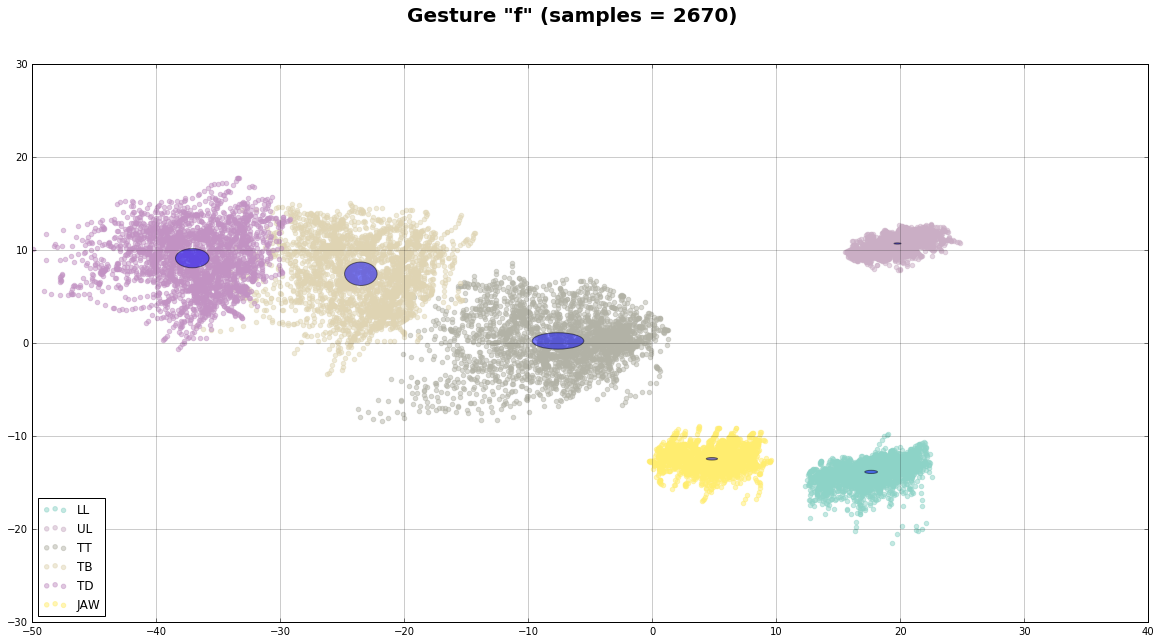

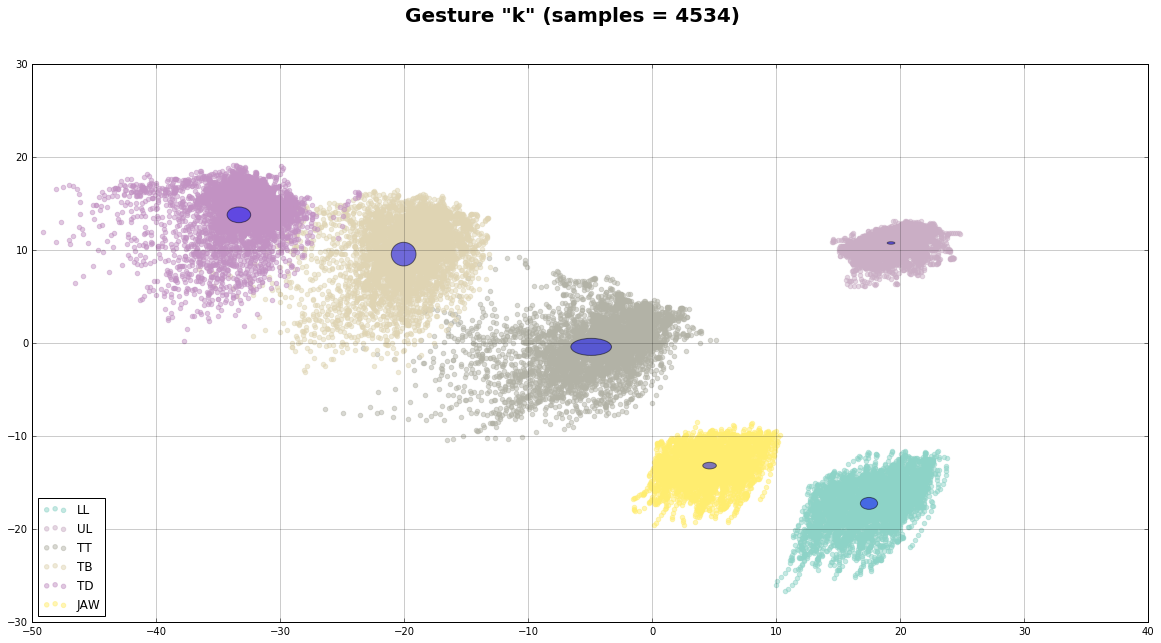

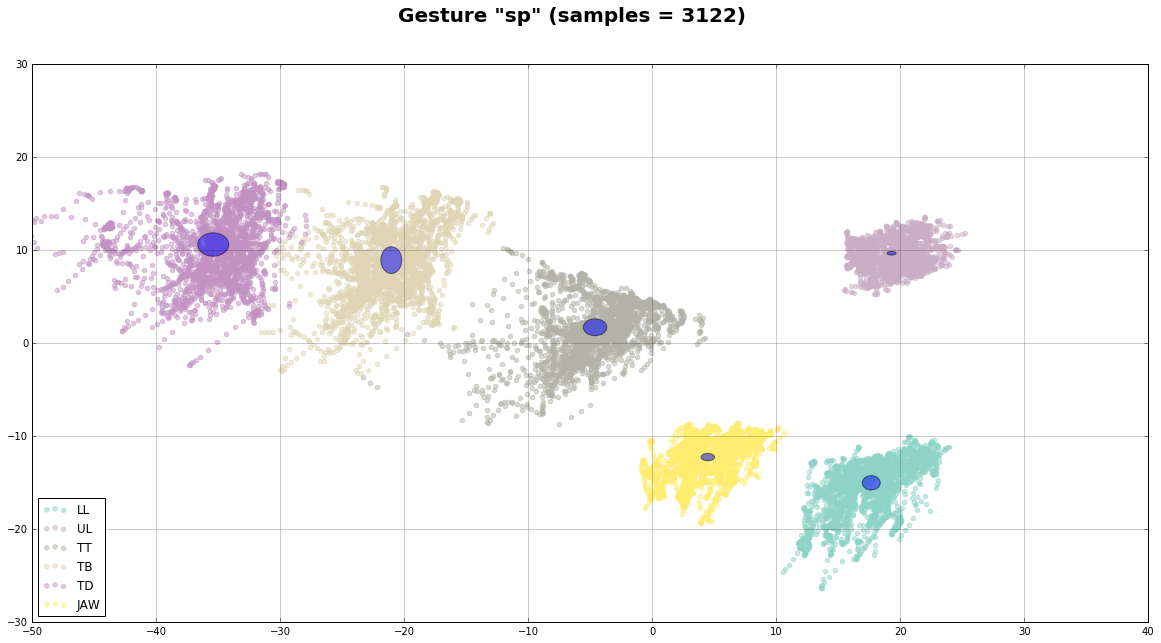

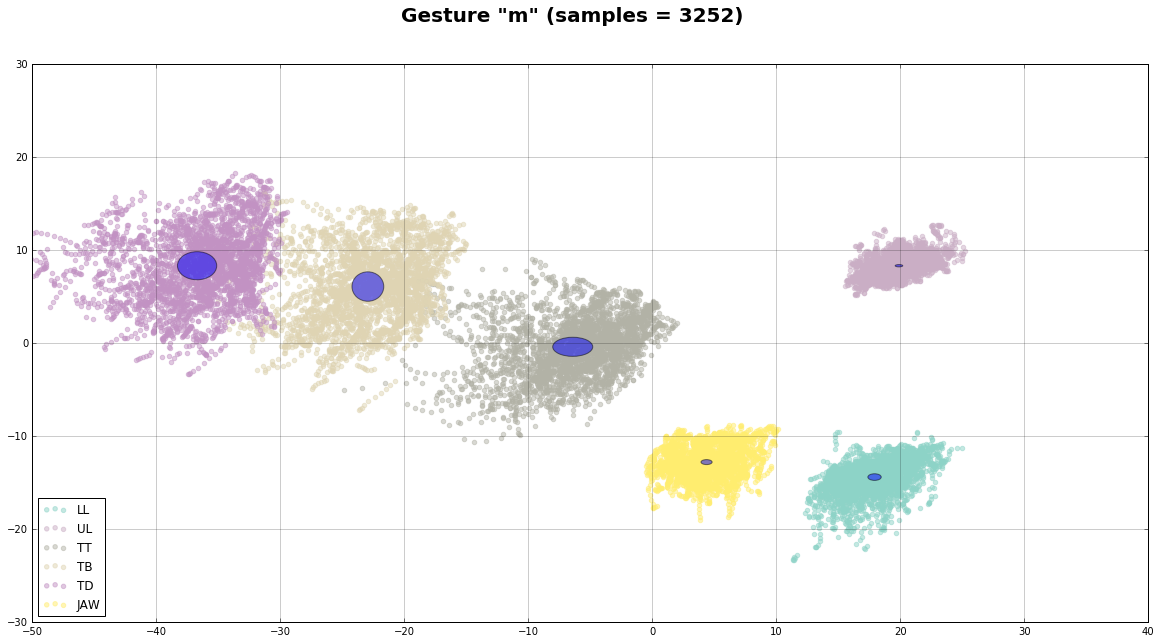

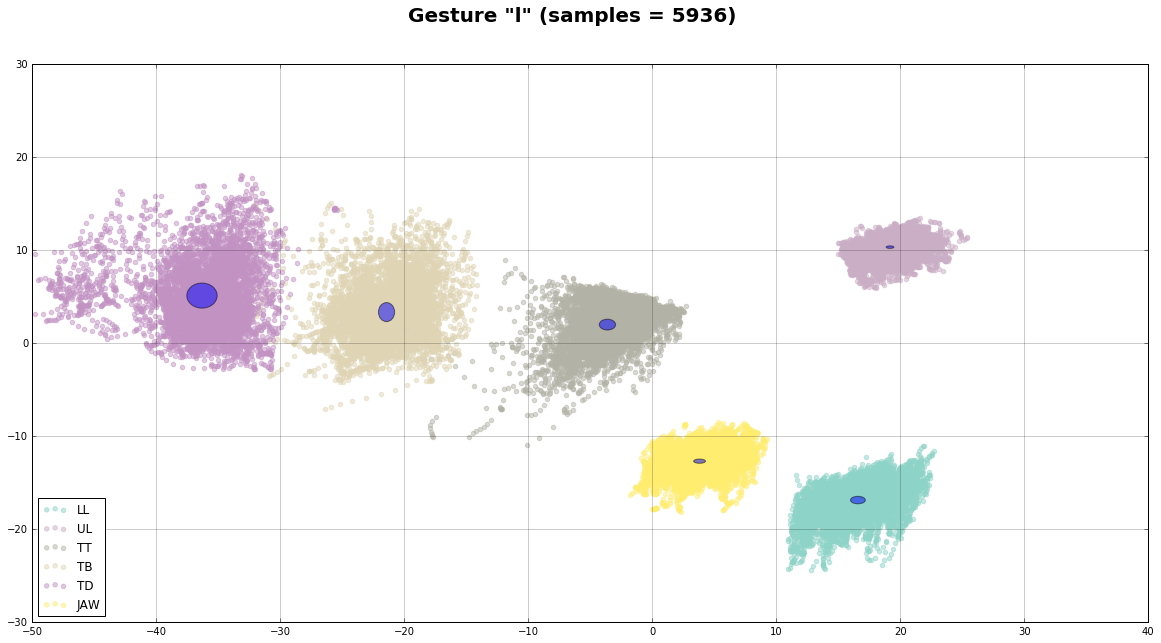

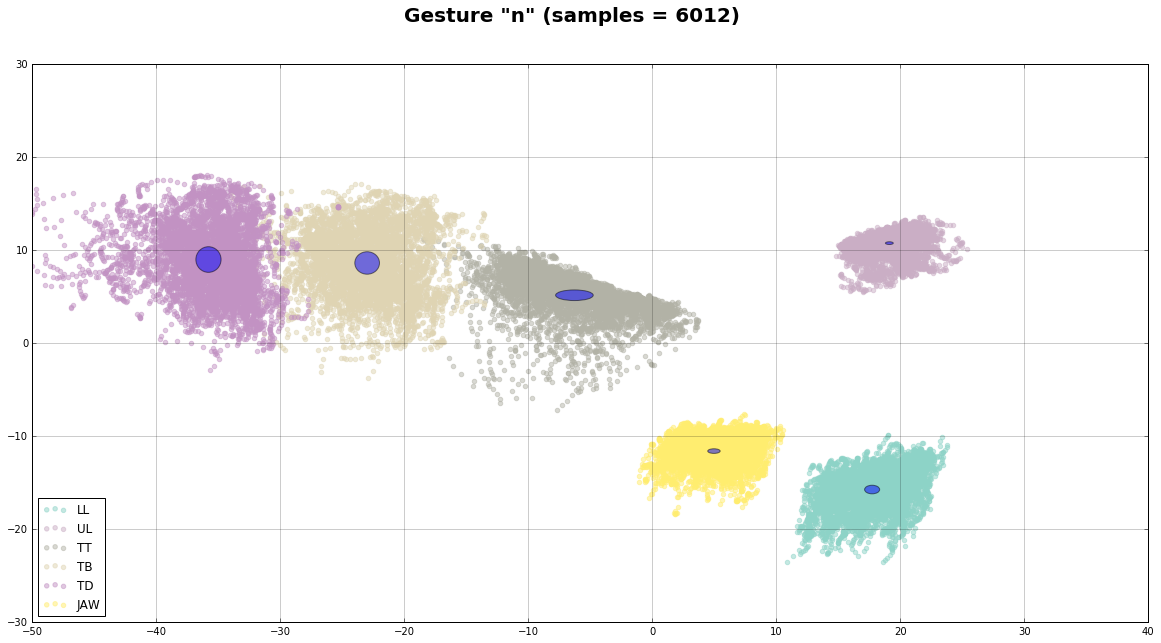

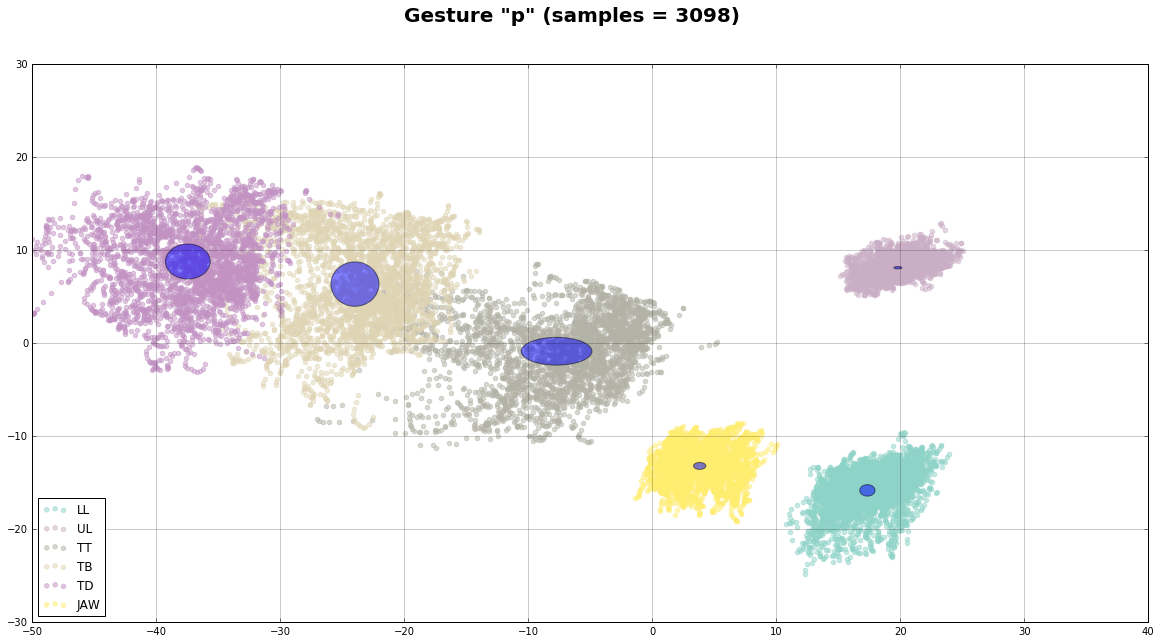

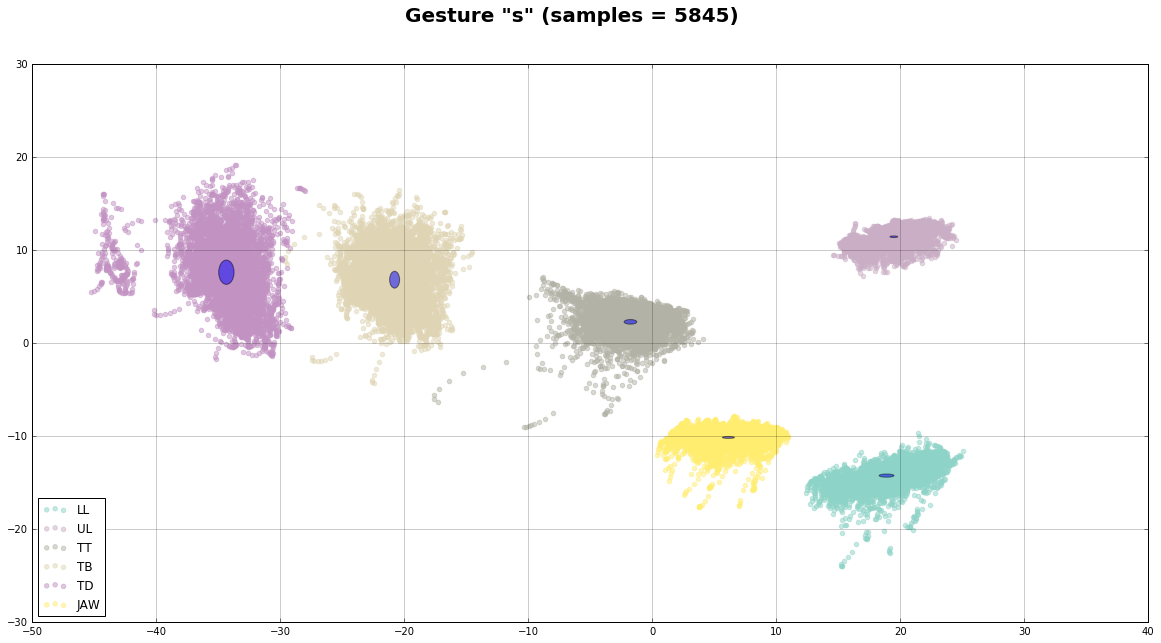

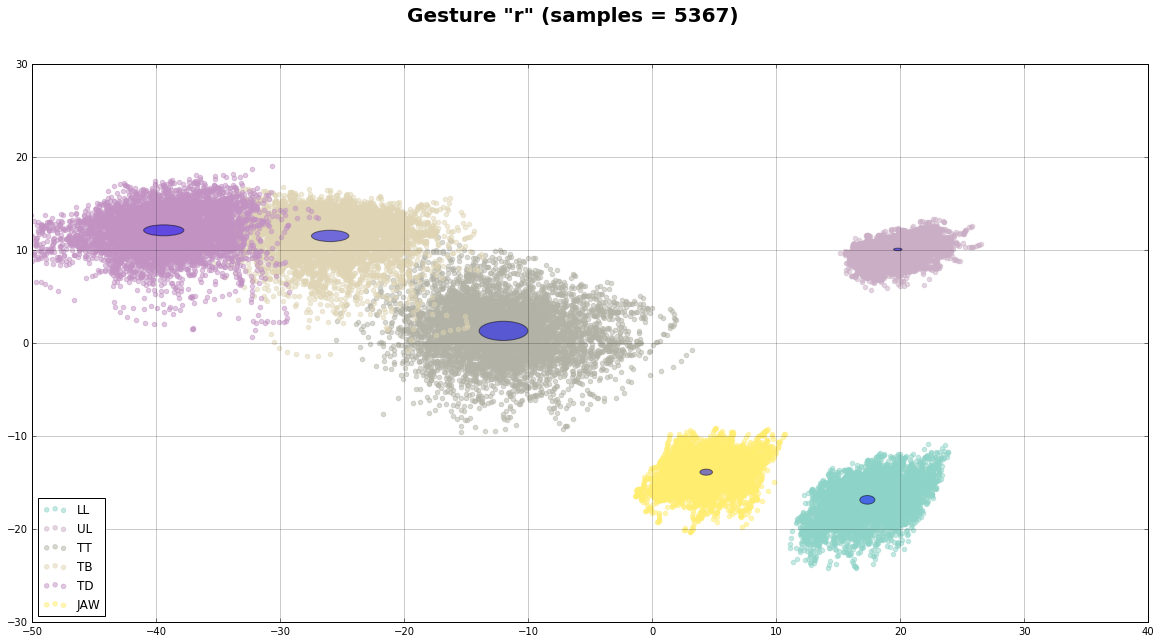

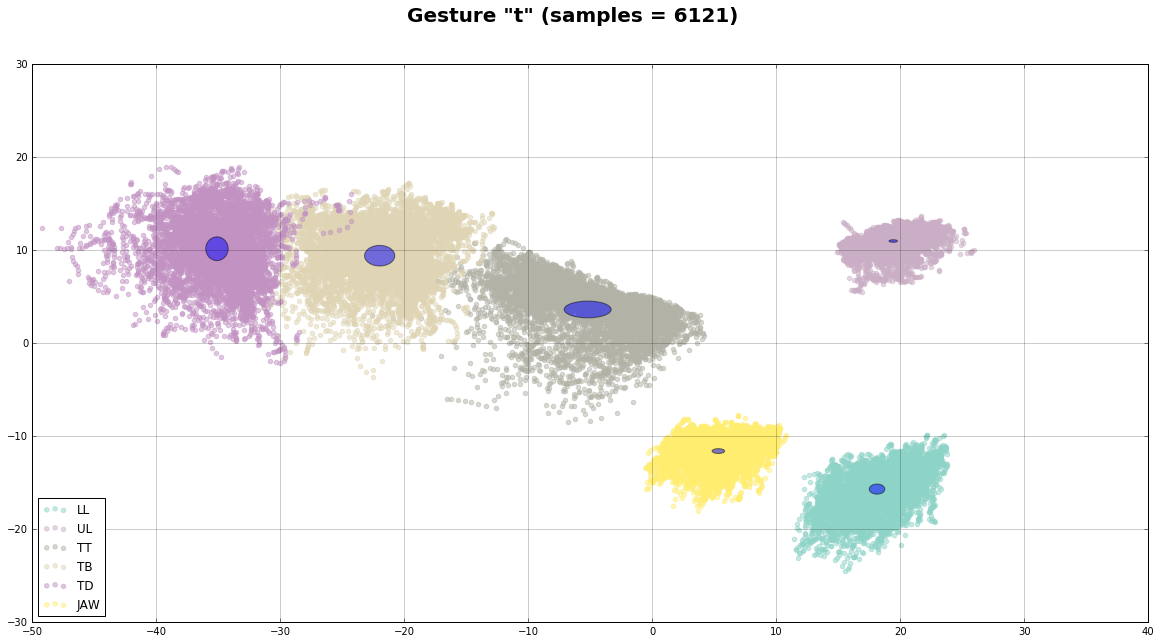

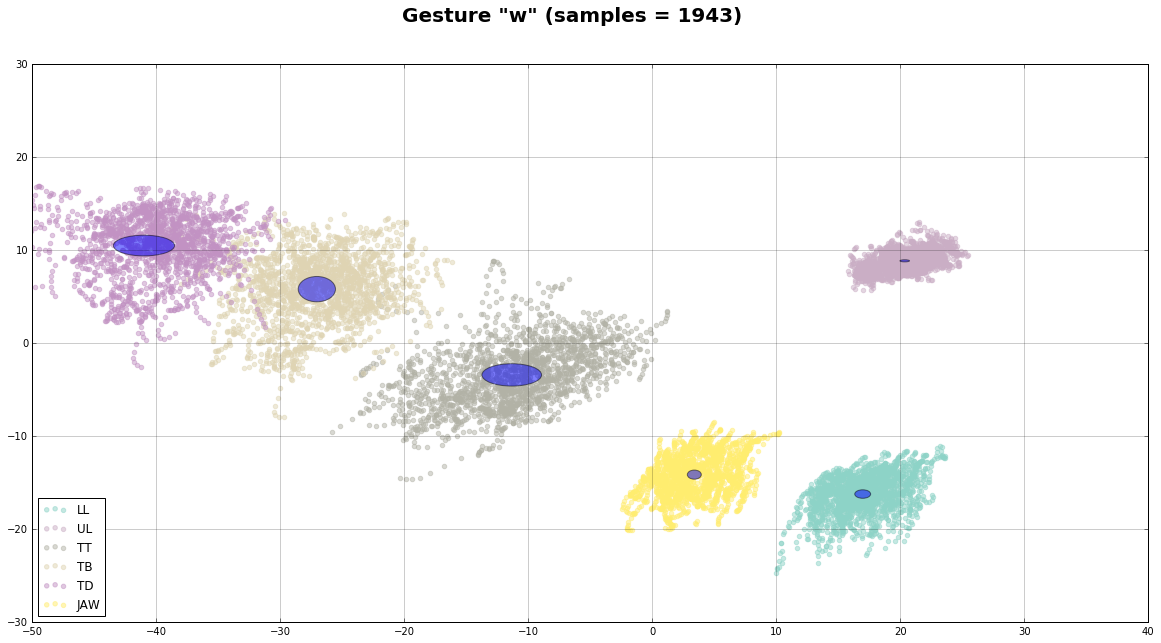

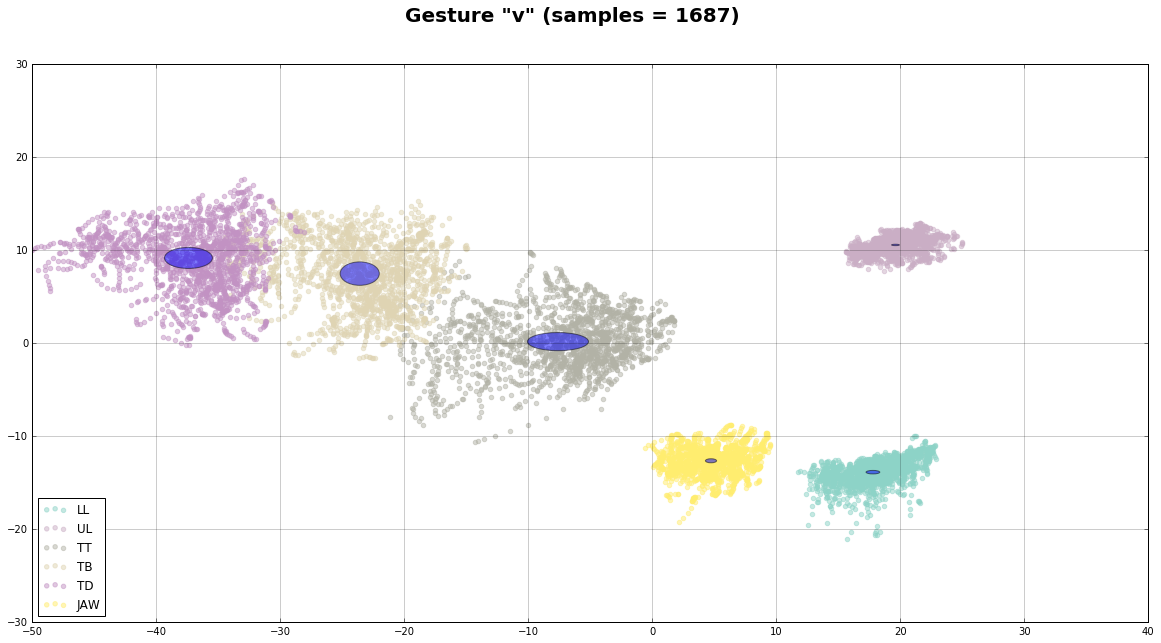

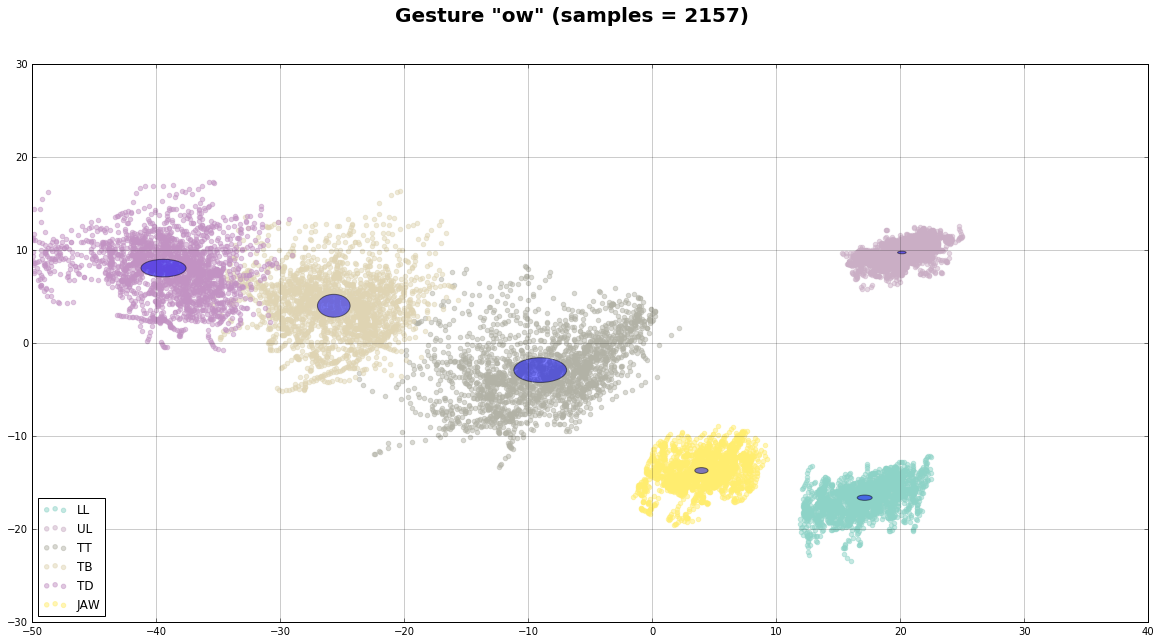

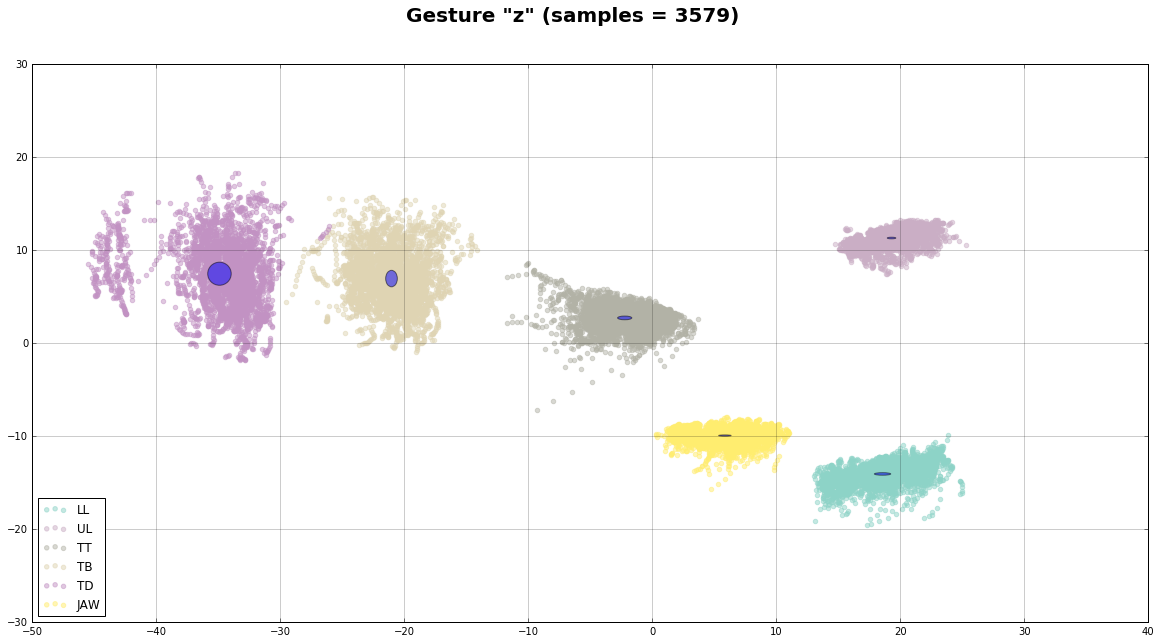

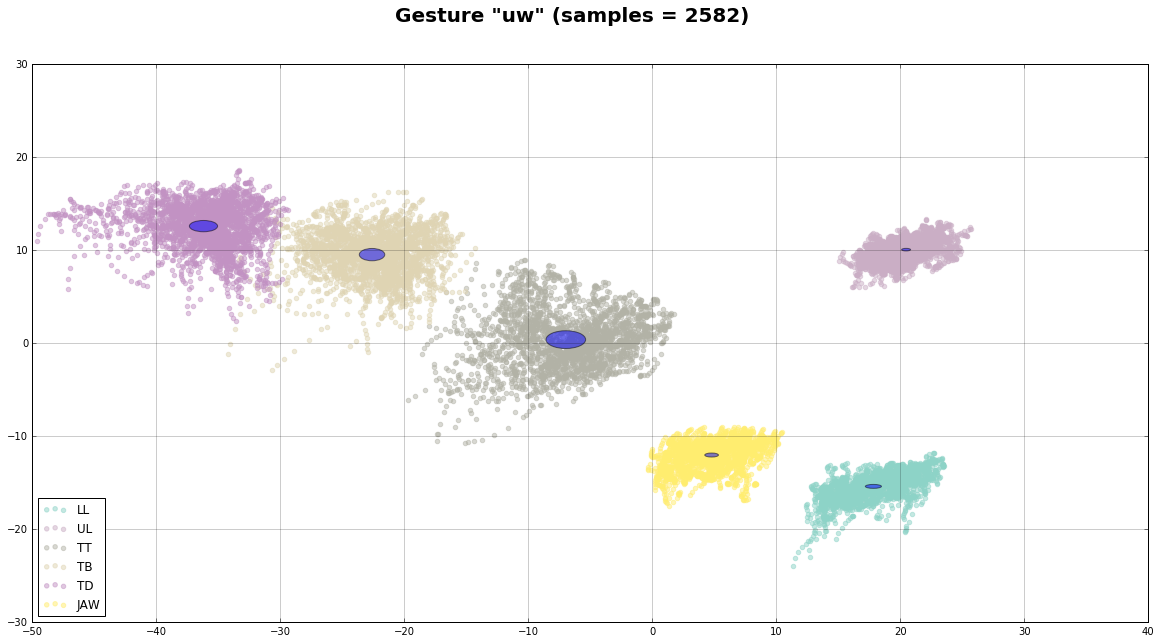

In [3]:
from matplotlib.patches import Ellipse

articulators = ["LL", "UL", "TT", "TB", "TD", "JAW"]

cmap = plt.get_cmap('Set3')
colors = [cmap(i) for i in np.linspace(0, 1, len(articulators))]
for g_name, g in gestures.items():
    fig1, ax1 = plt.subplots(figsize=(20, 10))
    fig1.suptitle("Gesture \"{}\" (samples = {})".format(g_name, len(g.params["LL_x"])),
                  fontsize=20, fontweight='bold')
    ax1.set_xlim(-50, 40)
    ax1.set_ylim(-30, 30)
    ax1.grid(color='black', linestyle='-', linewidth=1, alpha=0.2)
#     img = plt.imread("vt_bg.jpg")
#     ax1.imshow(img, extent=[-100, 40, -70, 50], alpha=0.3)
    g_m = g.get_mean()
    g_v = g.get_variance()
    
    for i in range(len(articulators)):
        a = articulators[i]
        a_x = g.params[a+"_x"]
        a_y = g.params[a+"_y"]
        plt.scatter(a_x, a_y, color=colors[i], alpha=0.5, label=a)
#         plot mean ellipse
        e = Ellipse(xy=[g_m[a+"_x"], g_m[a+"_y"]],
                    width=g_v[a+"_x"]/5, height=g_v[a+"_y"]/5, alpha=0.5)
        ax1.add_artist(e)
        plt.legend(loc='lower left')
    
    plt.show()

## Normalize Gestures

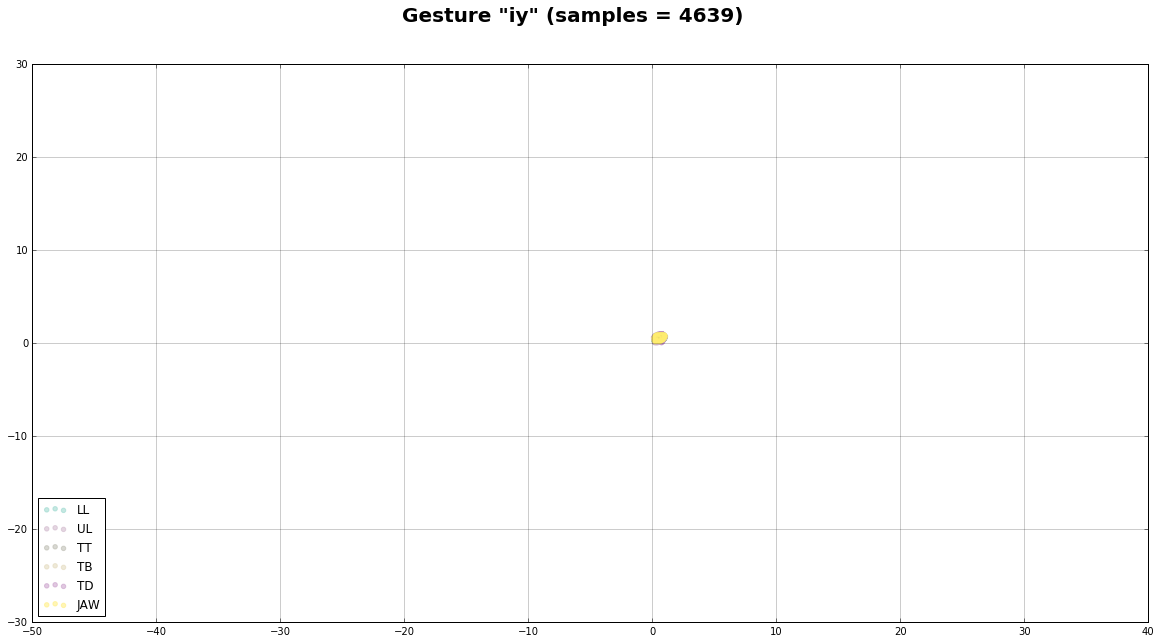

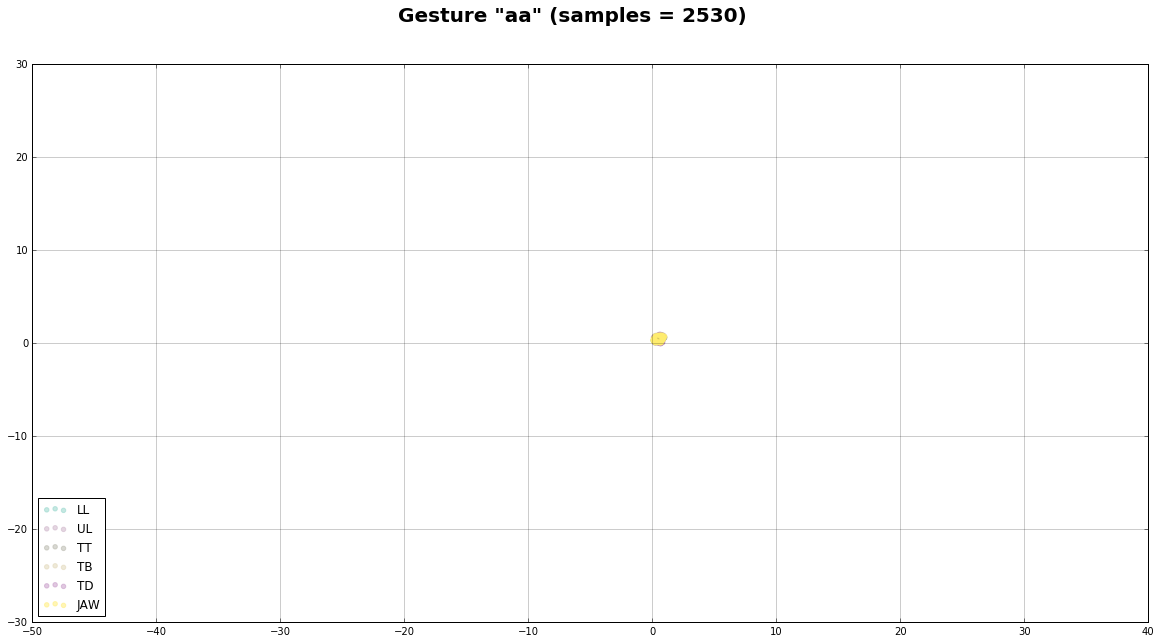

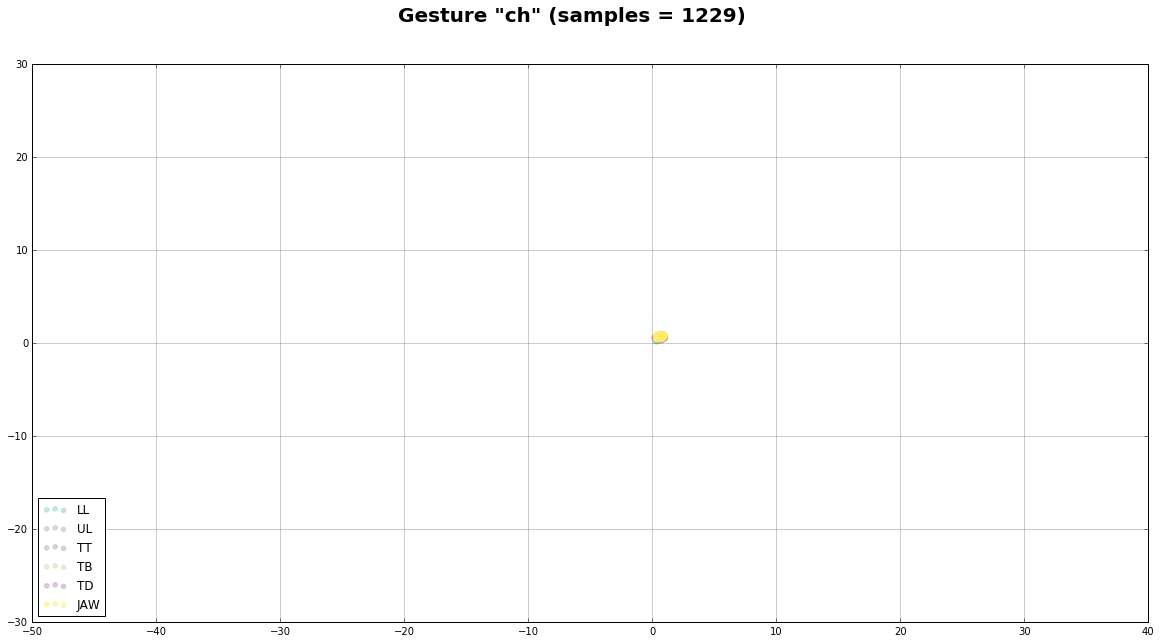

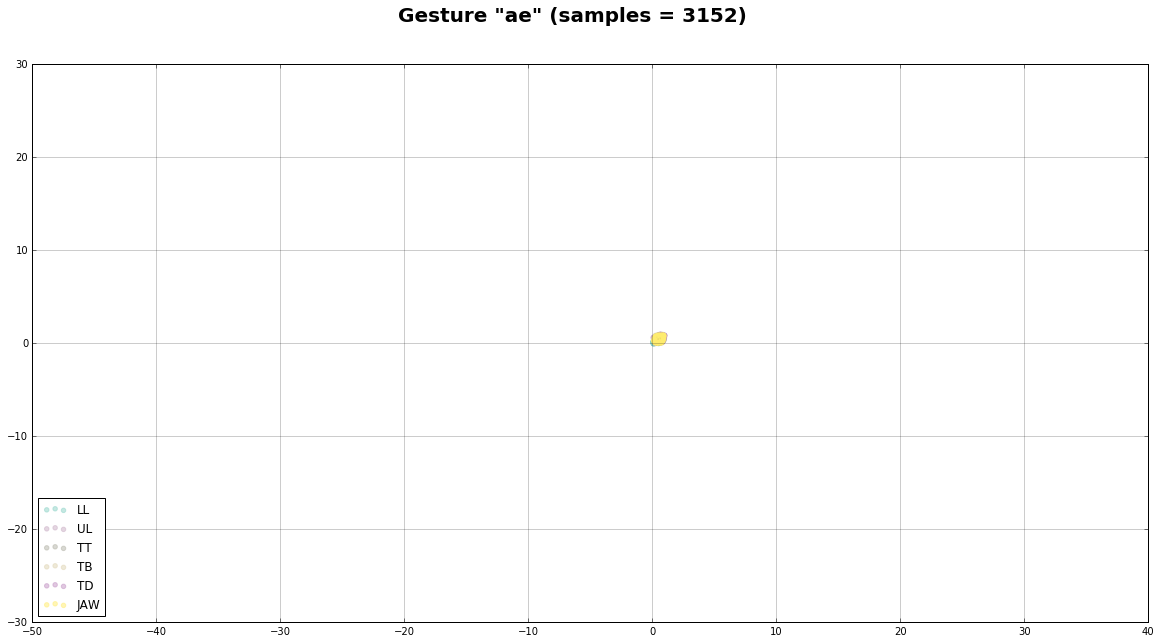

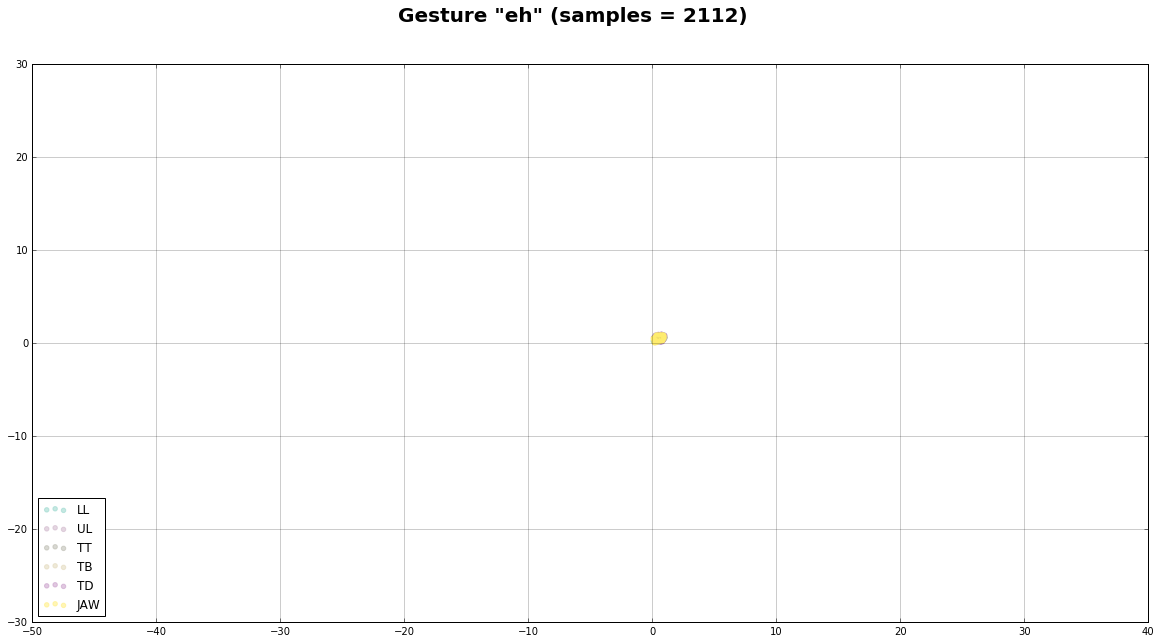

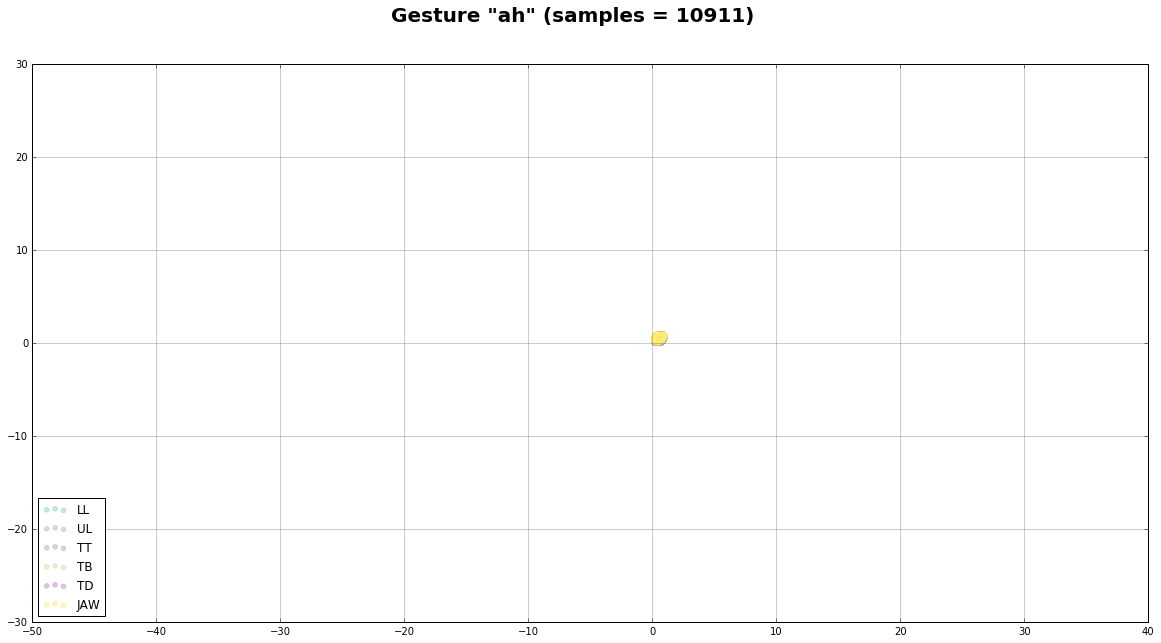

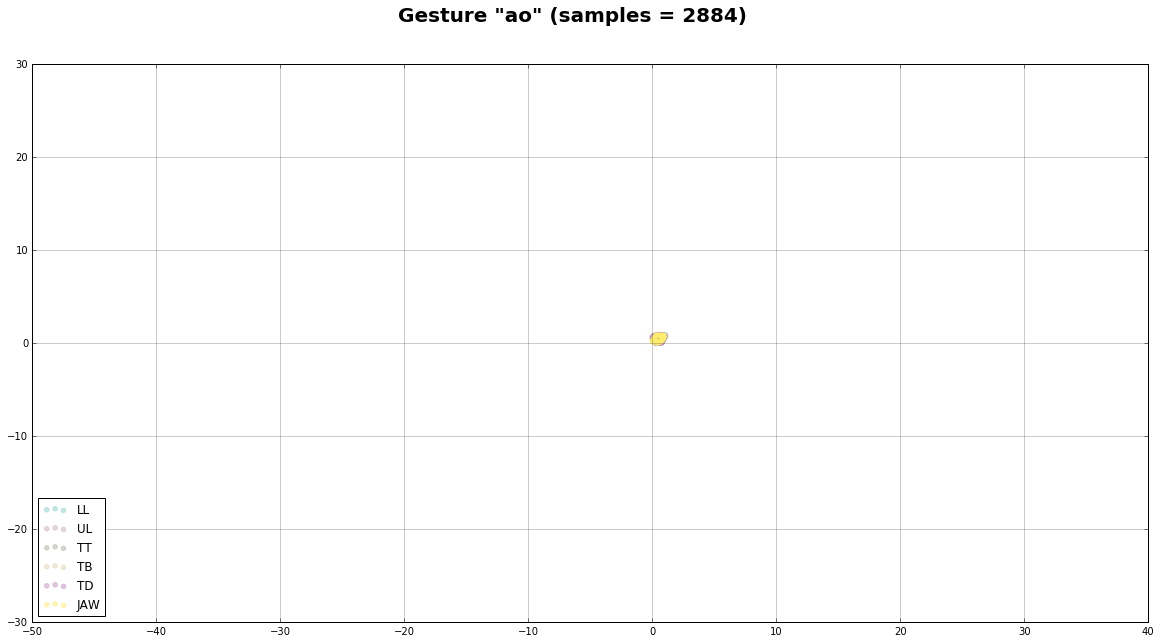

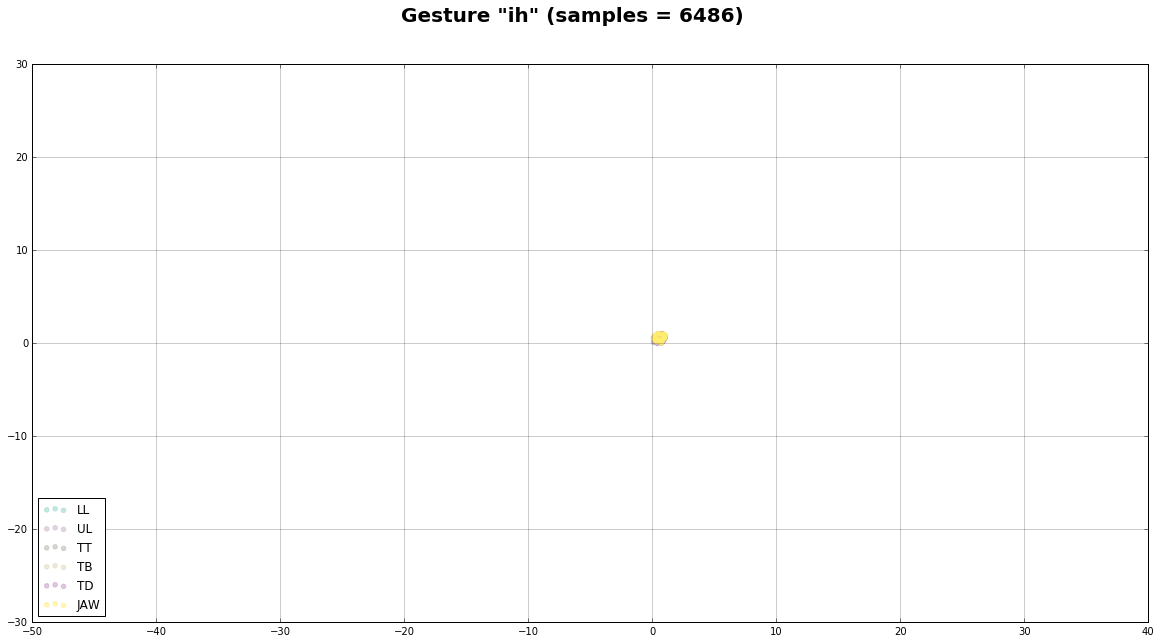

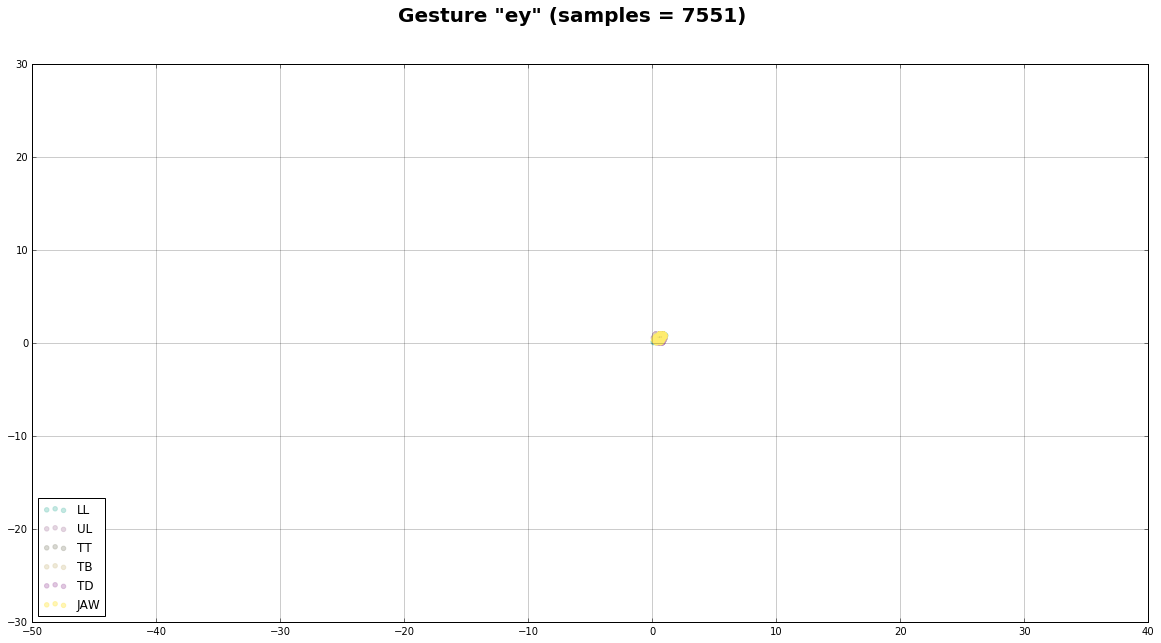

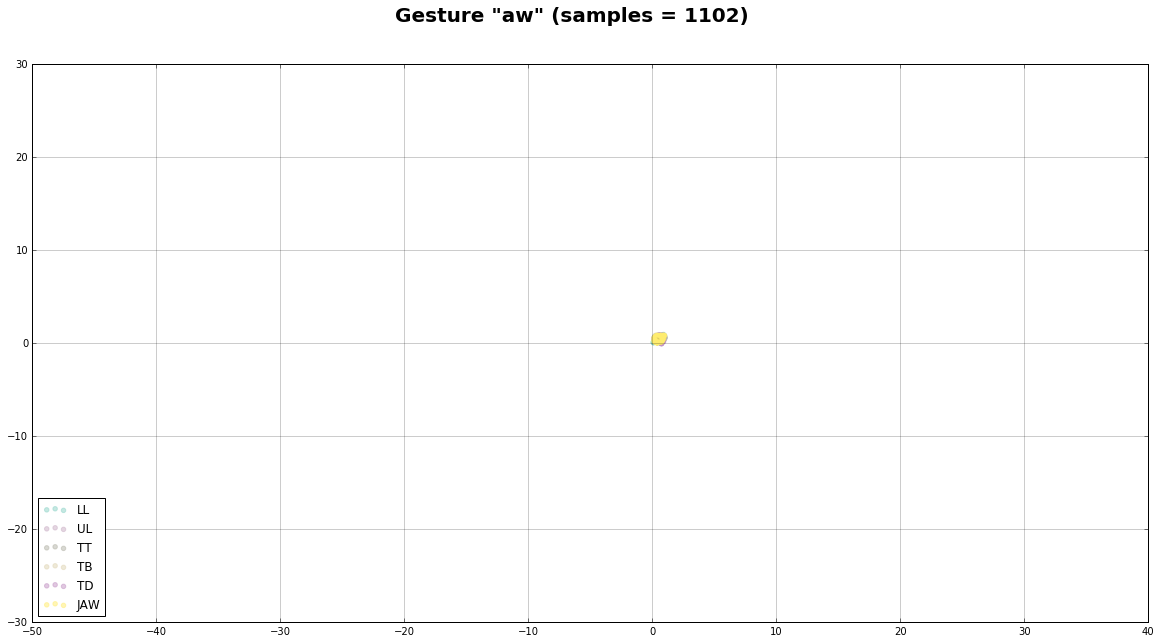

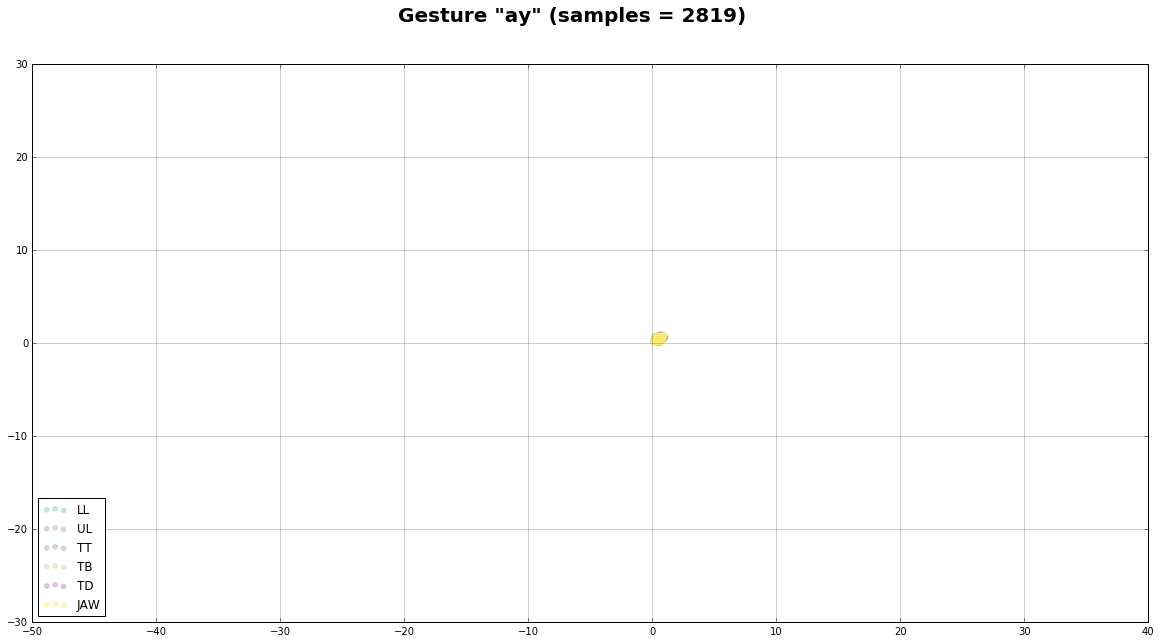

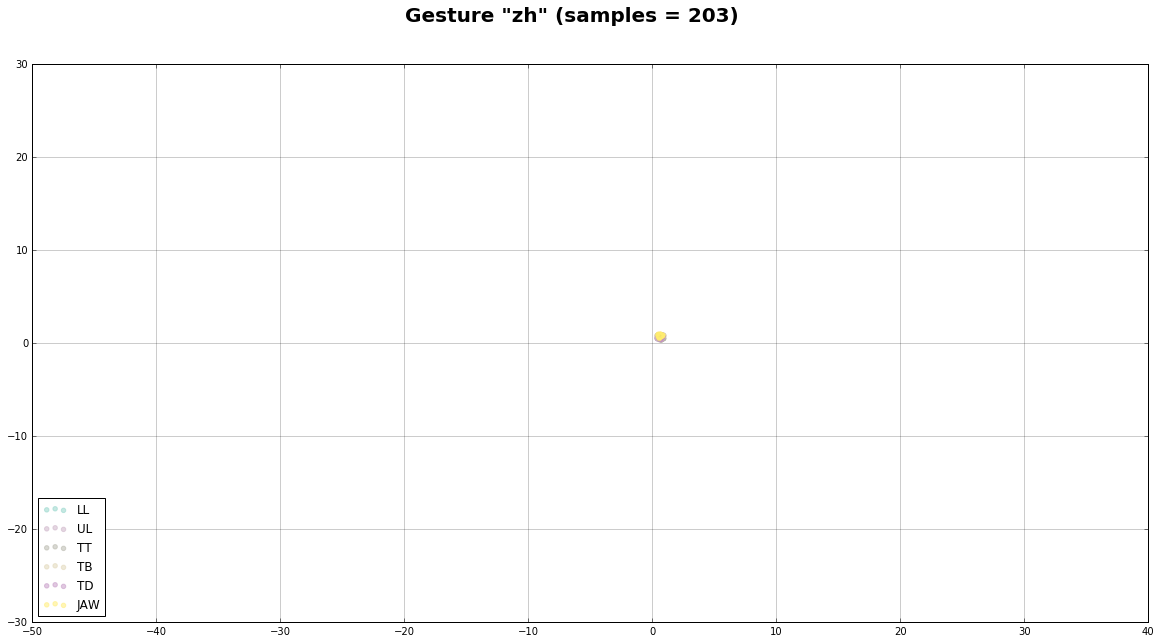

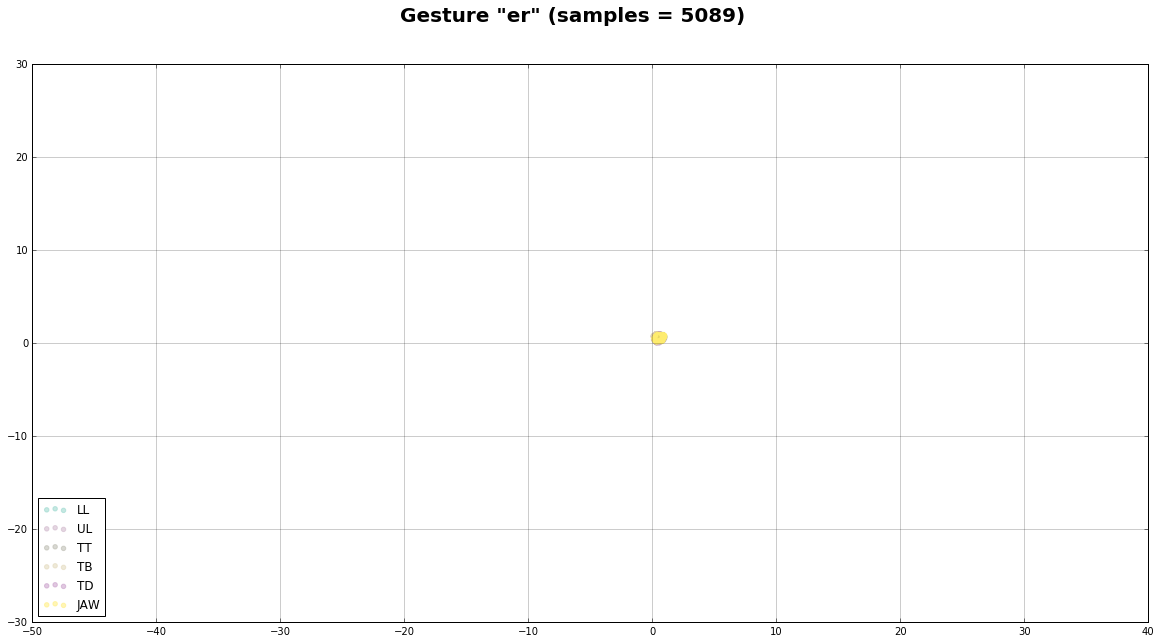

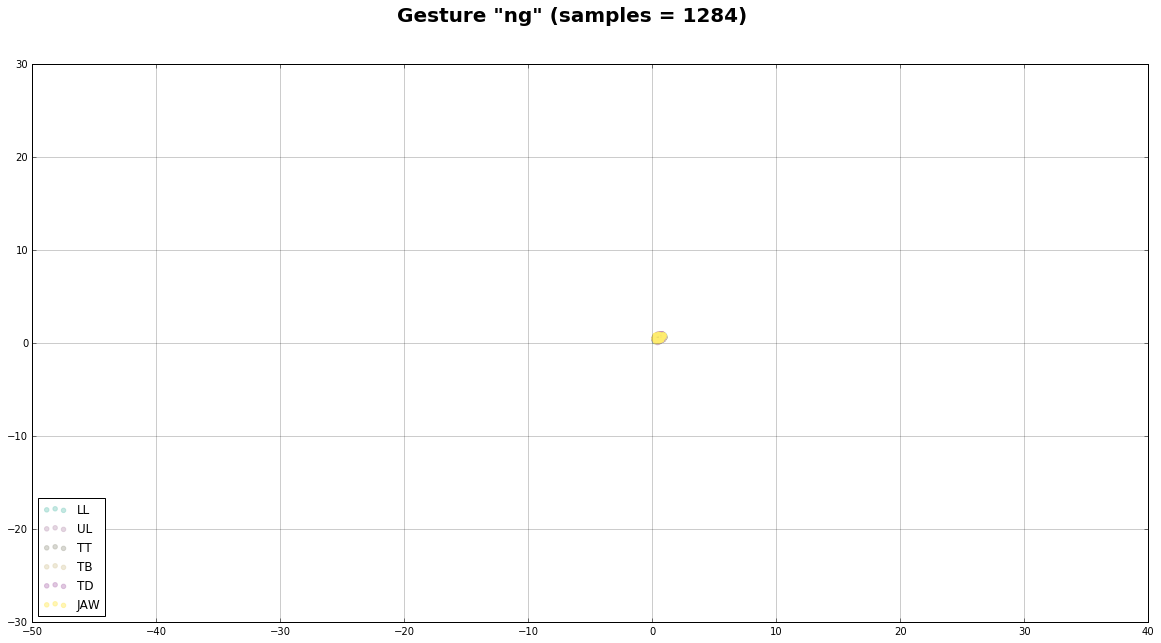

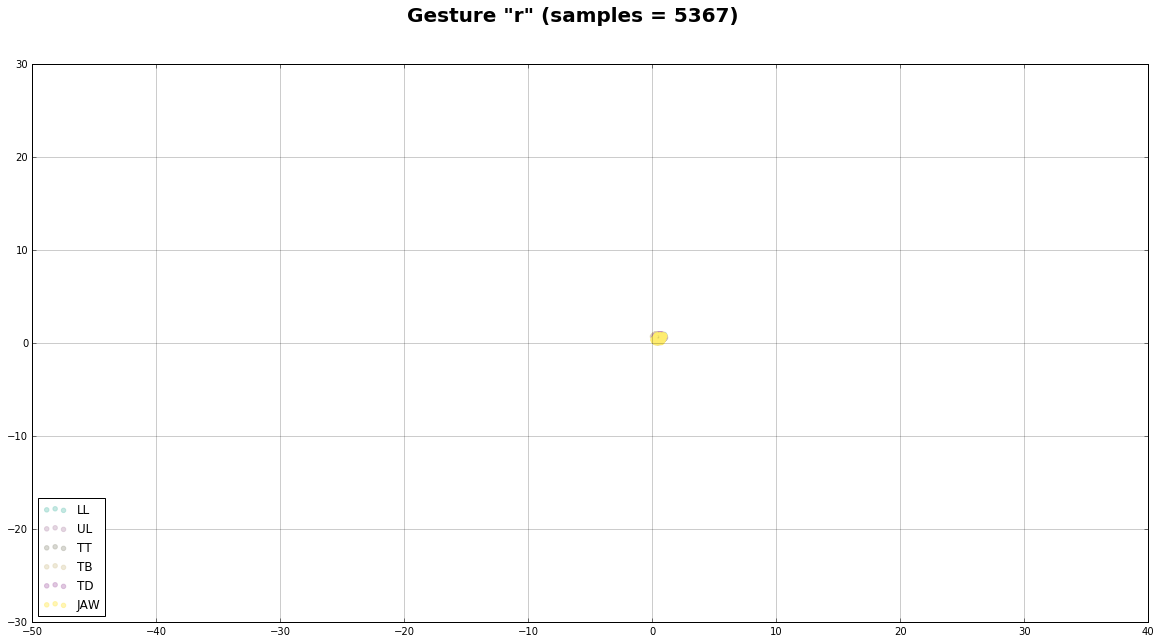

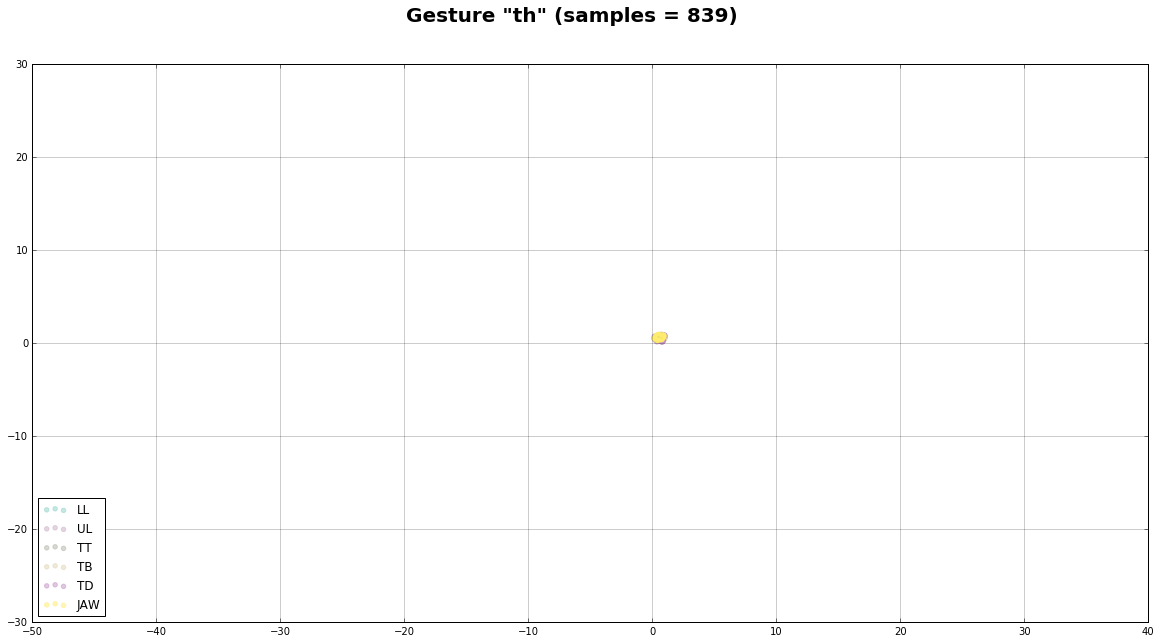

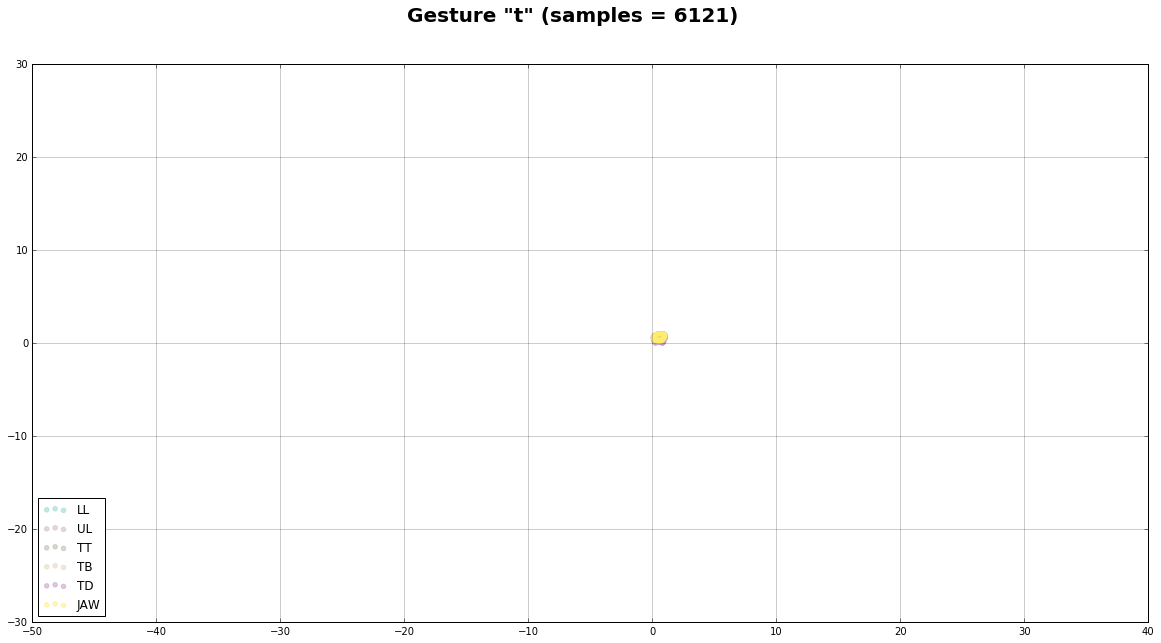

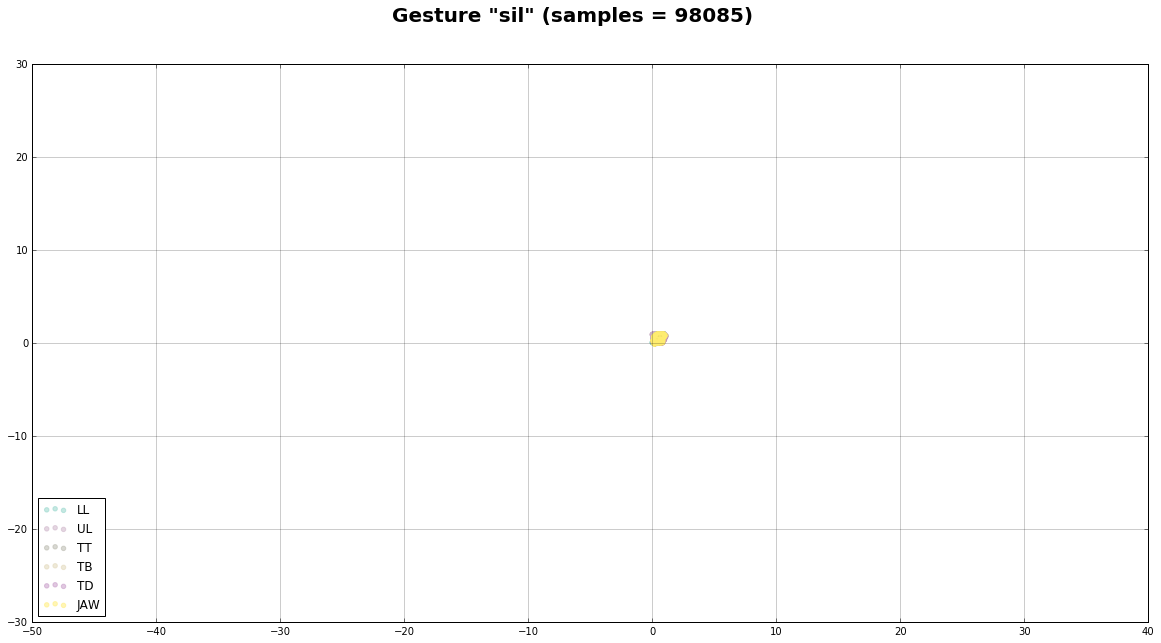

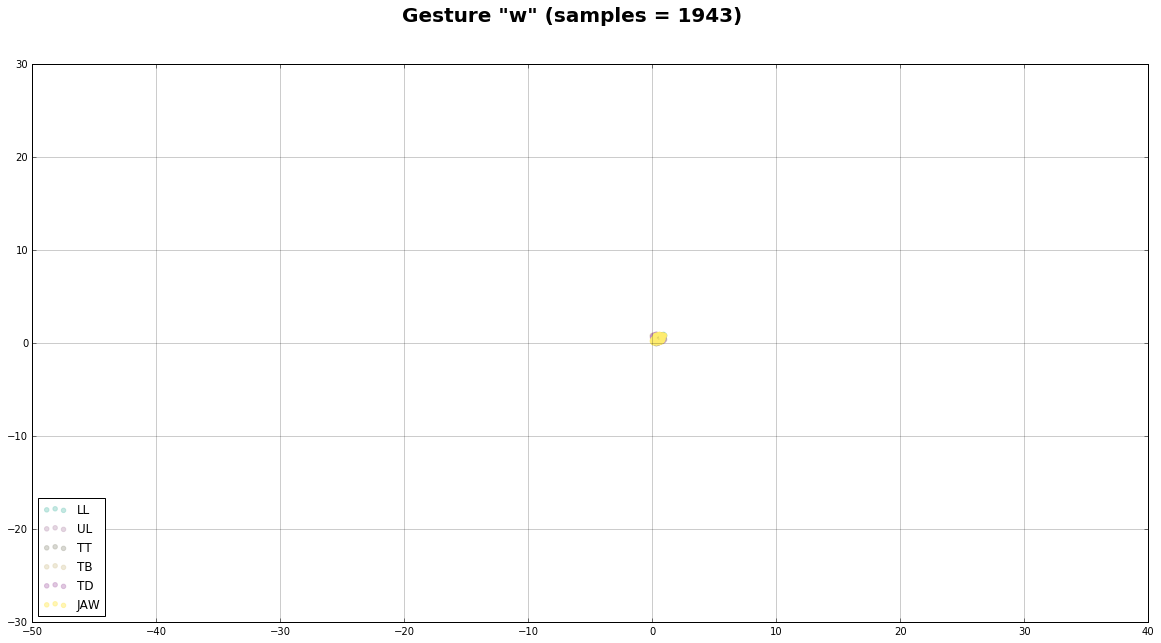

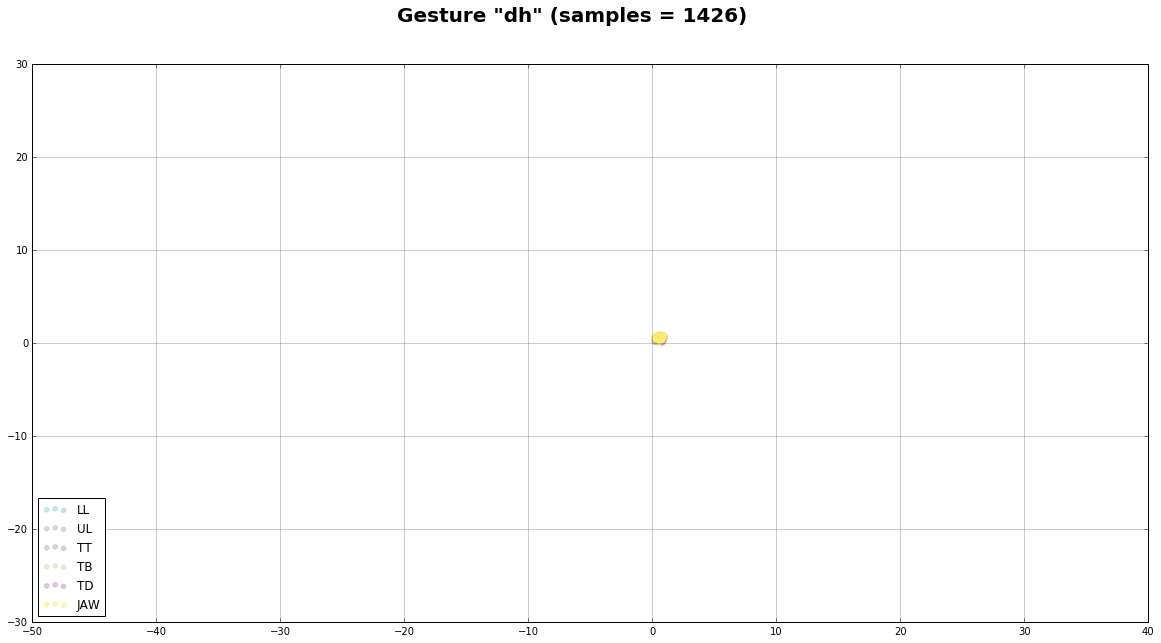

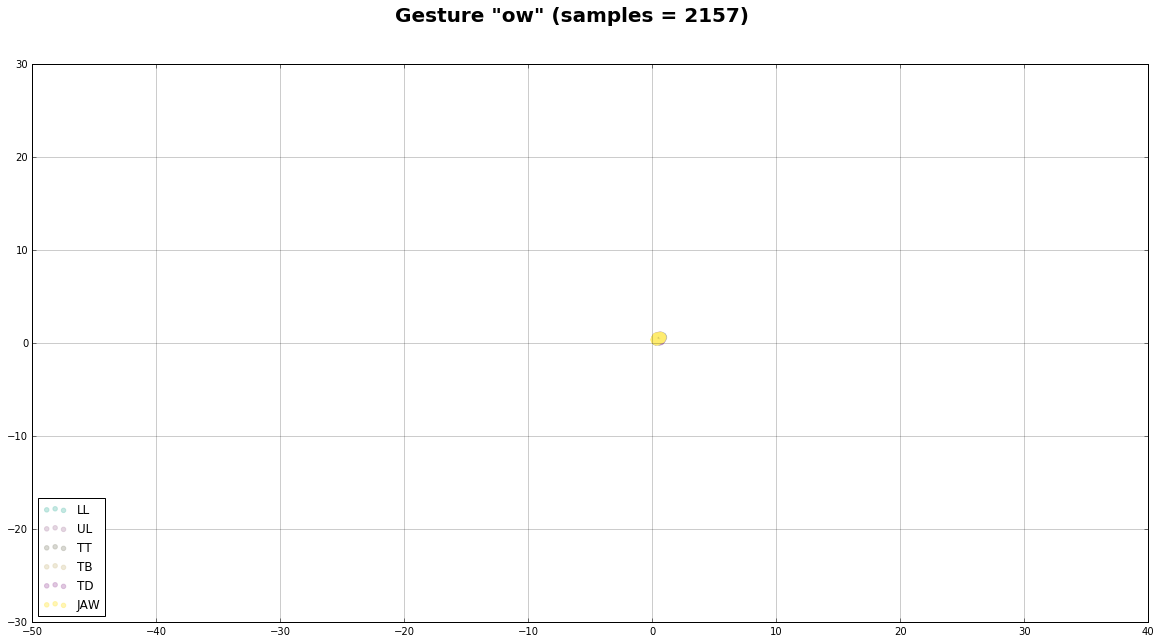

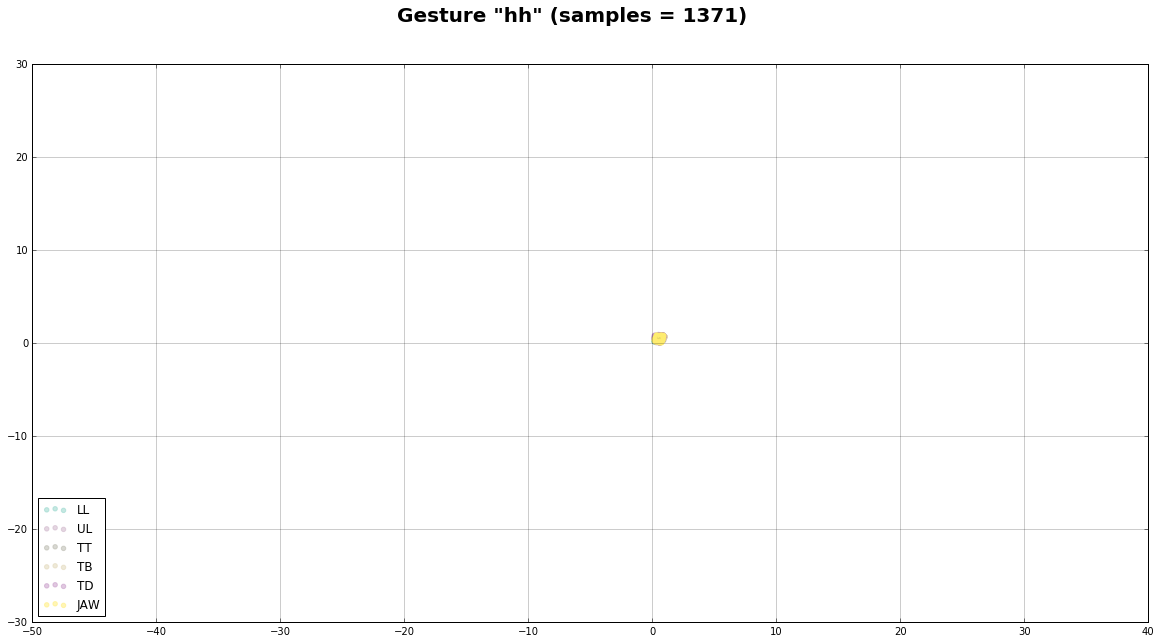

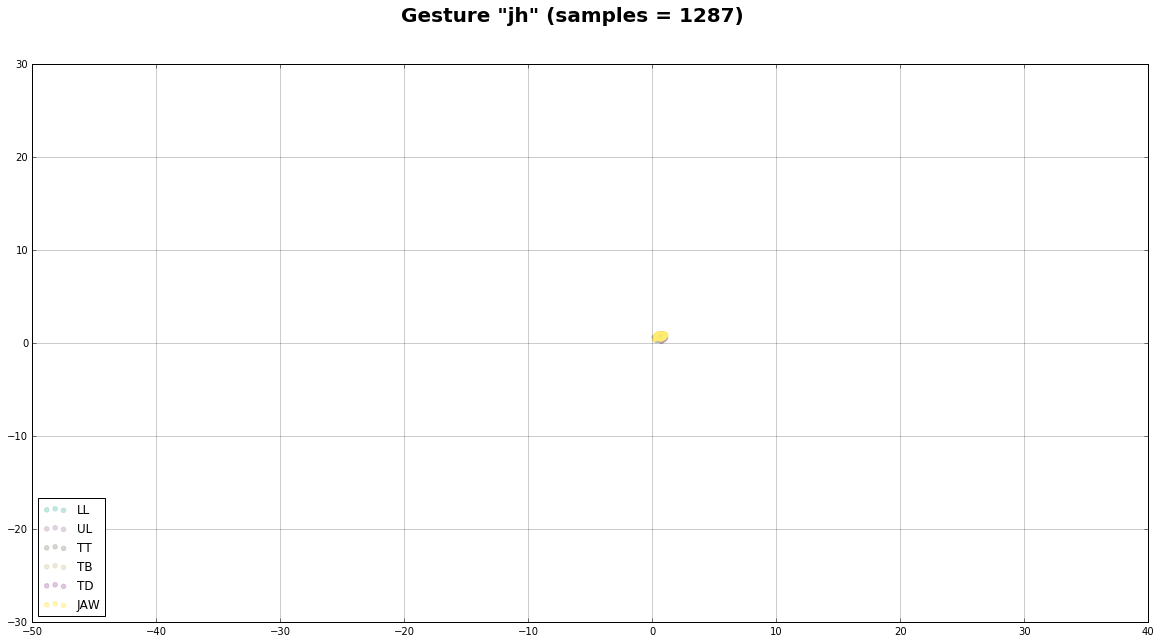

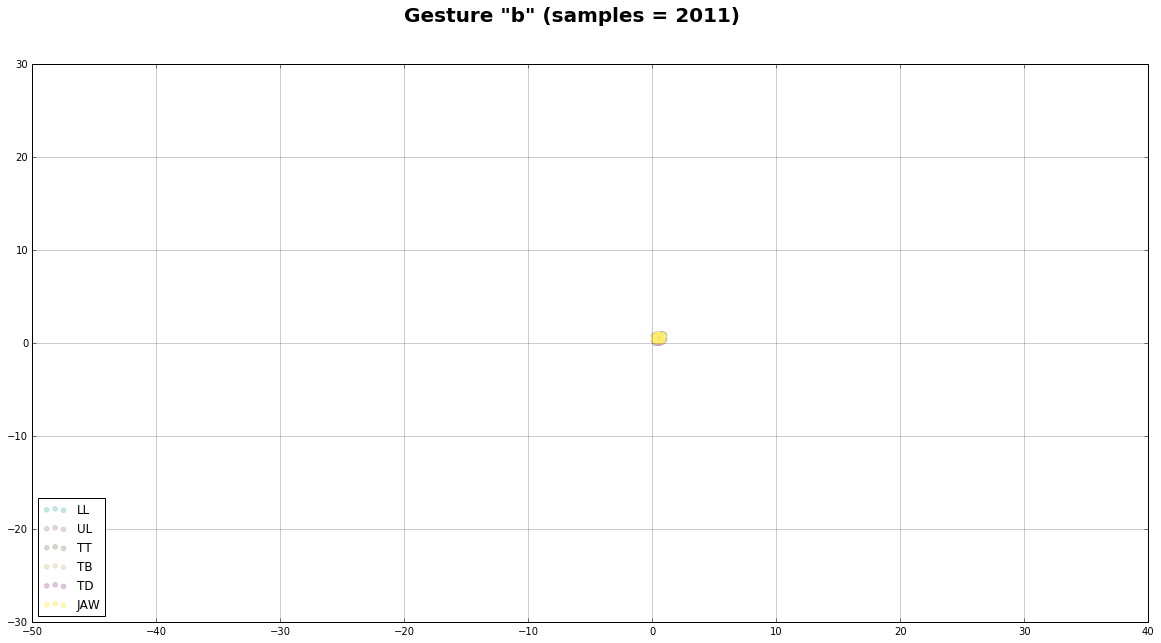

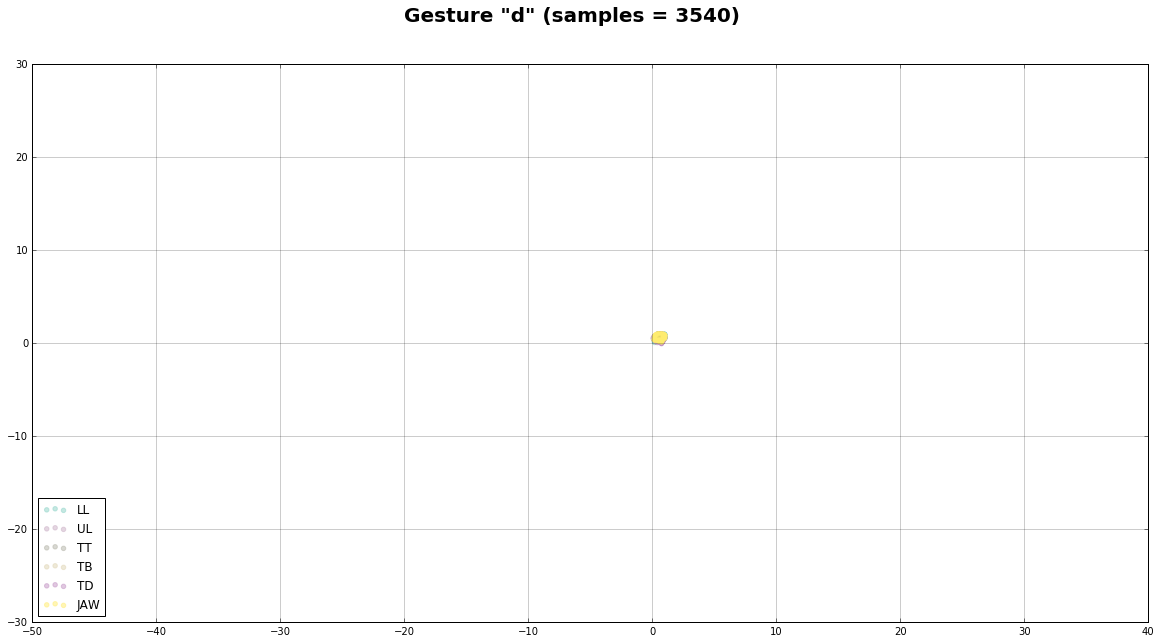

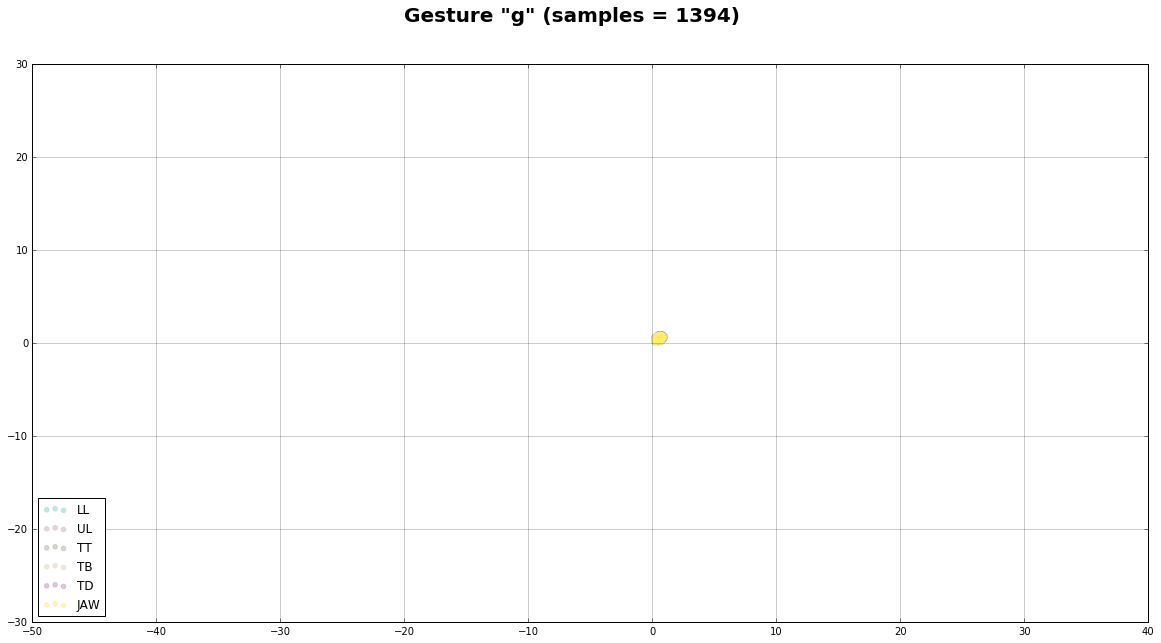

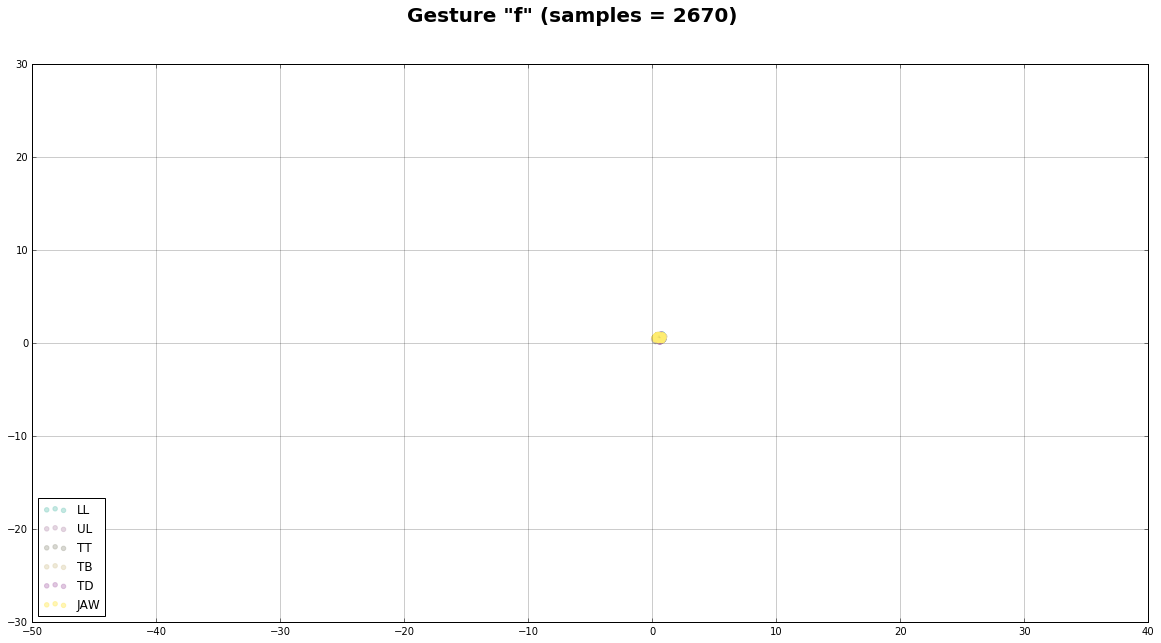

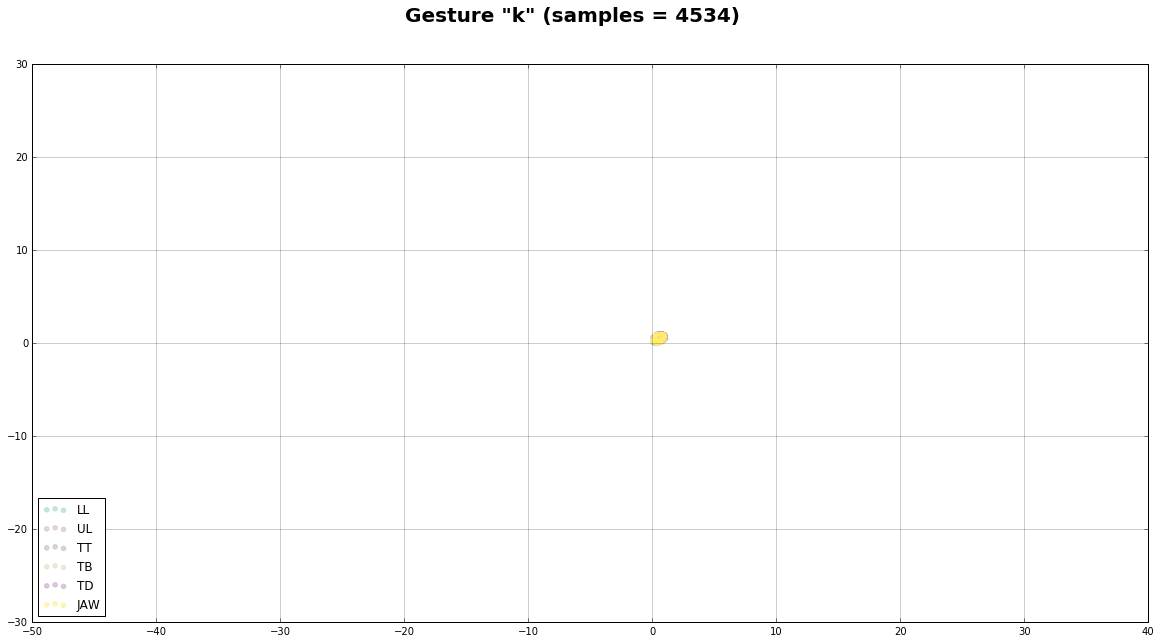

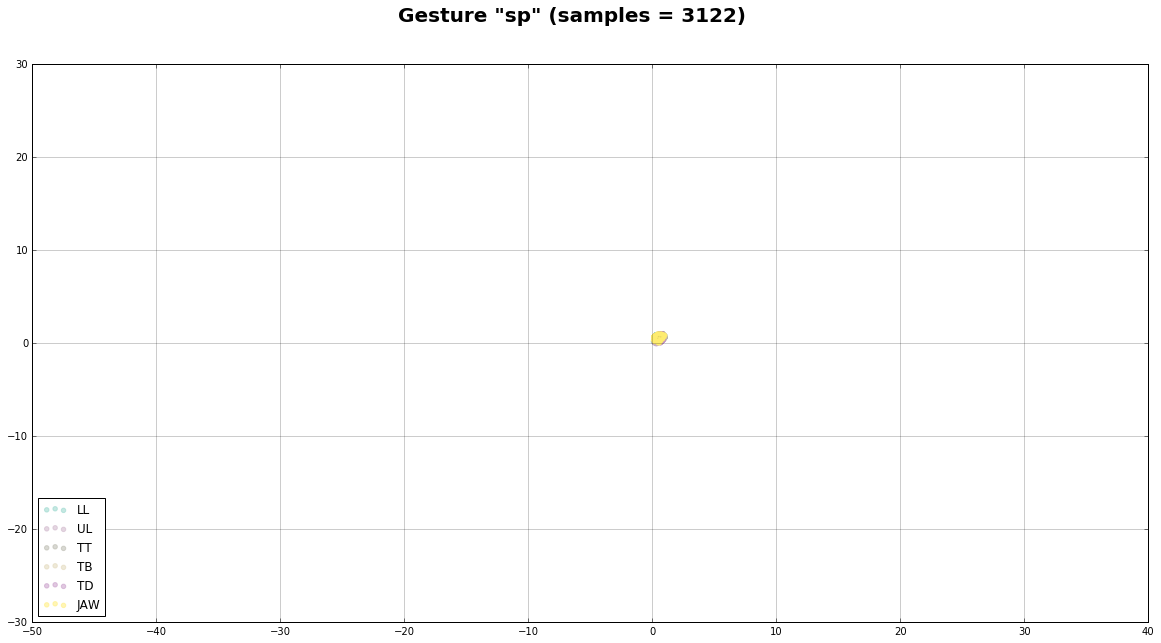

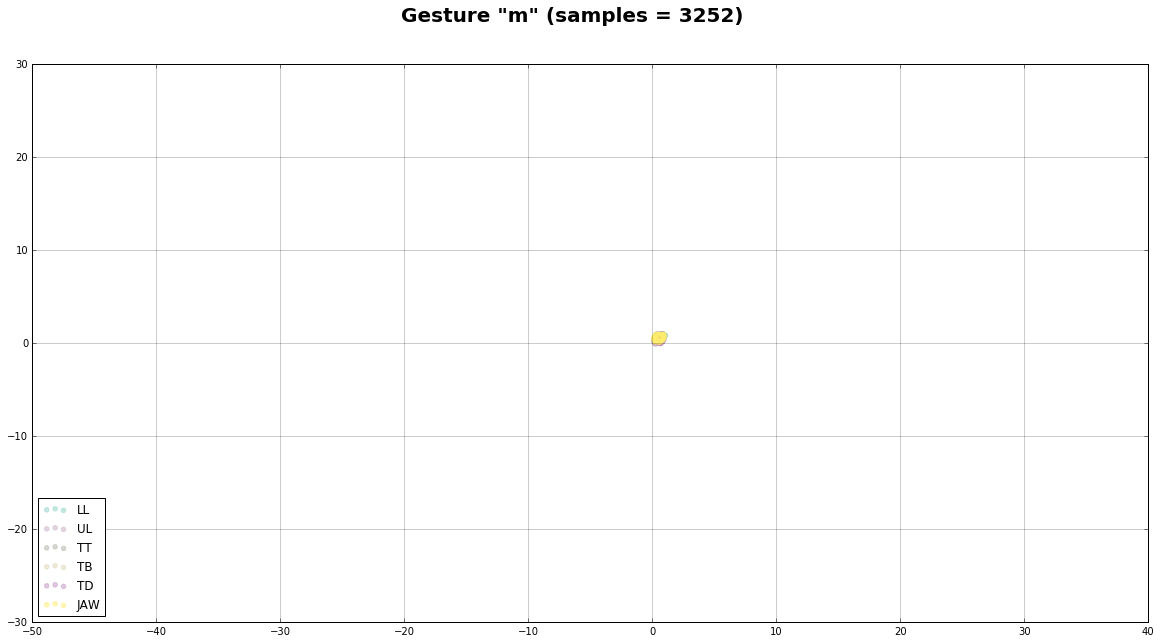

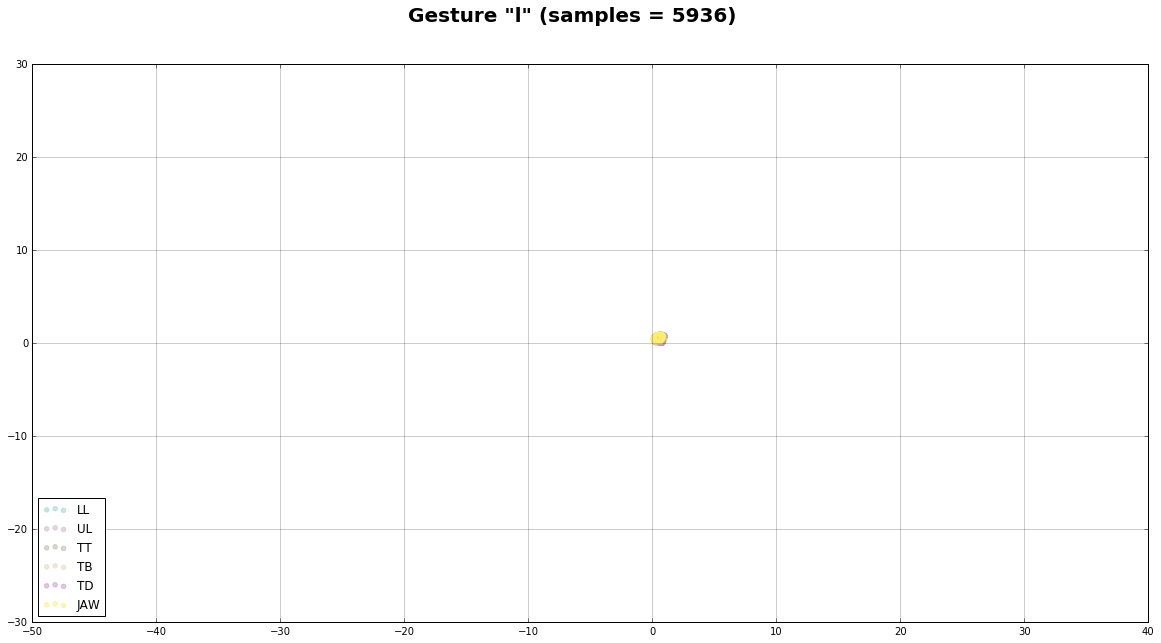

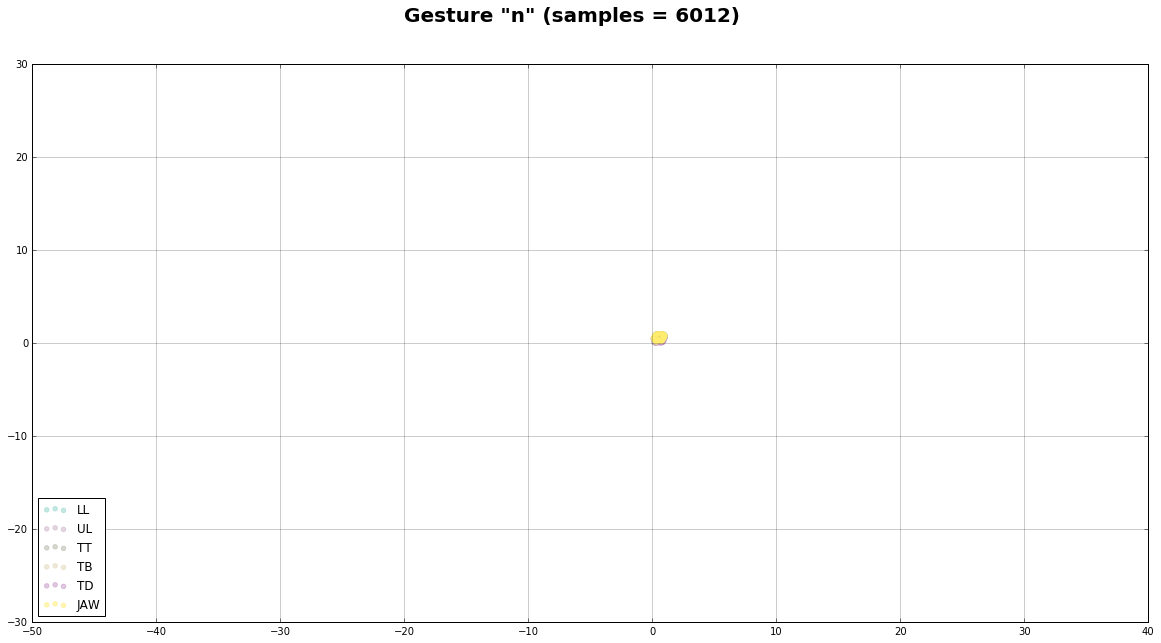

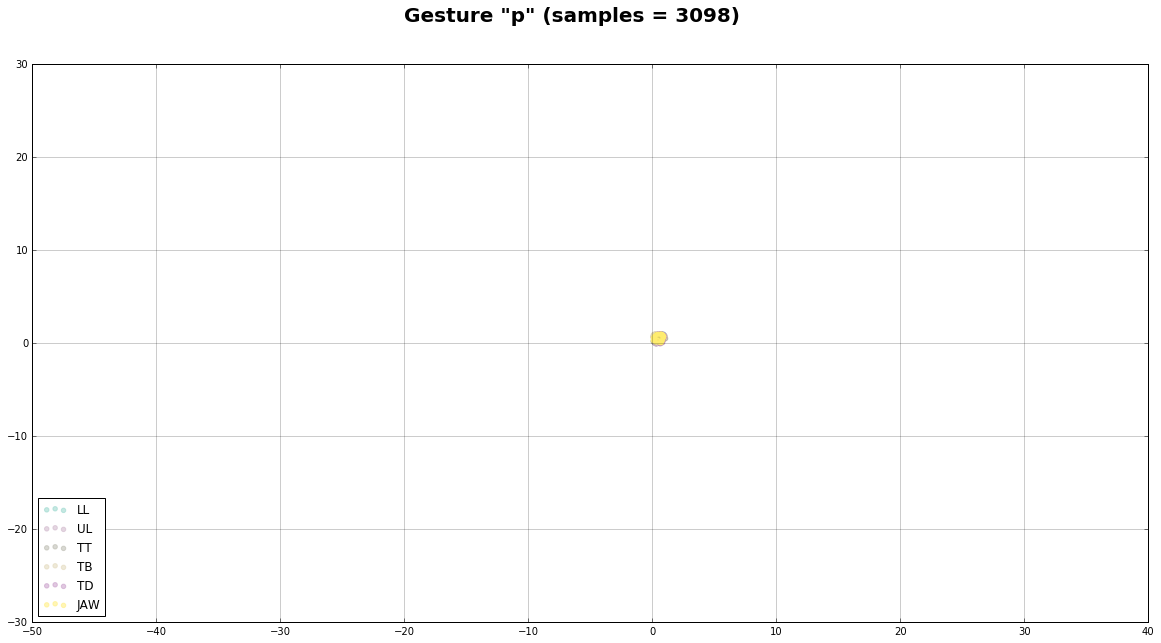

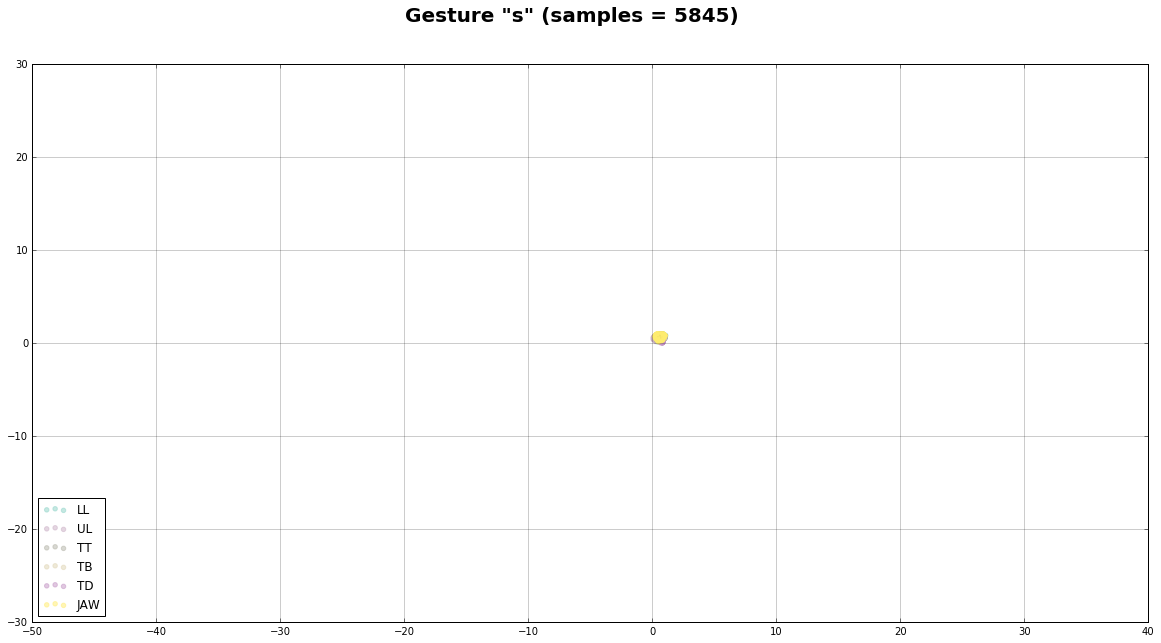

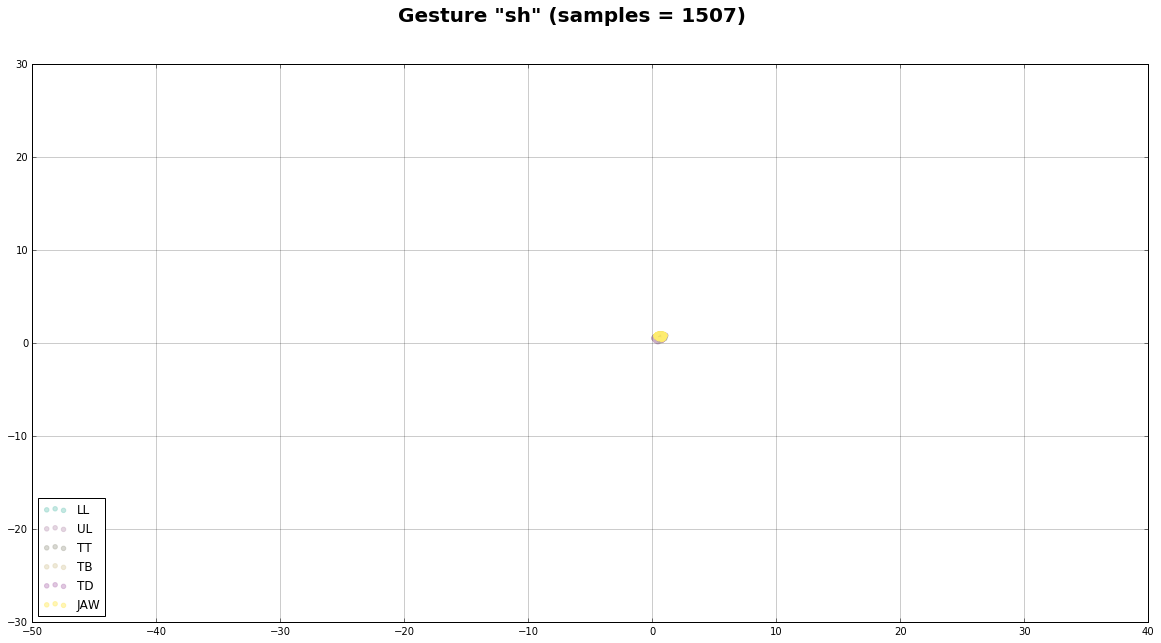

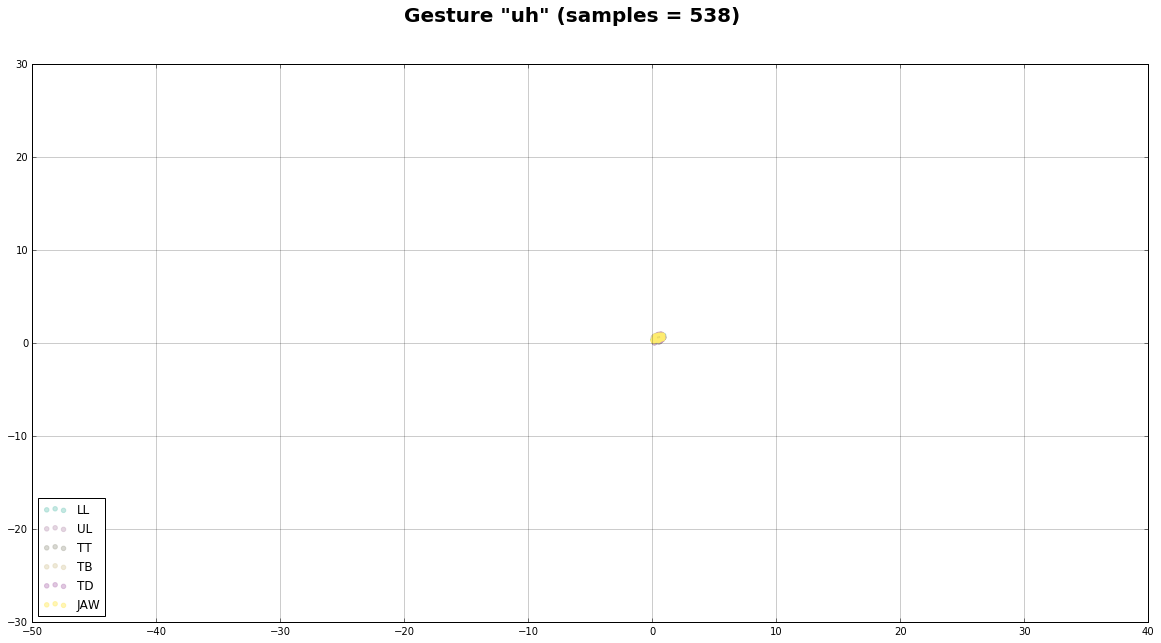

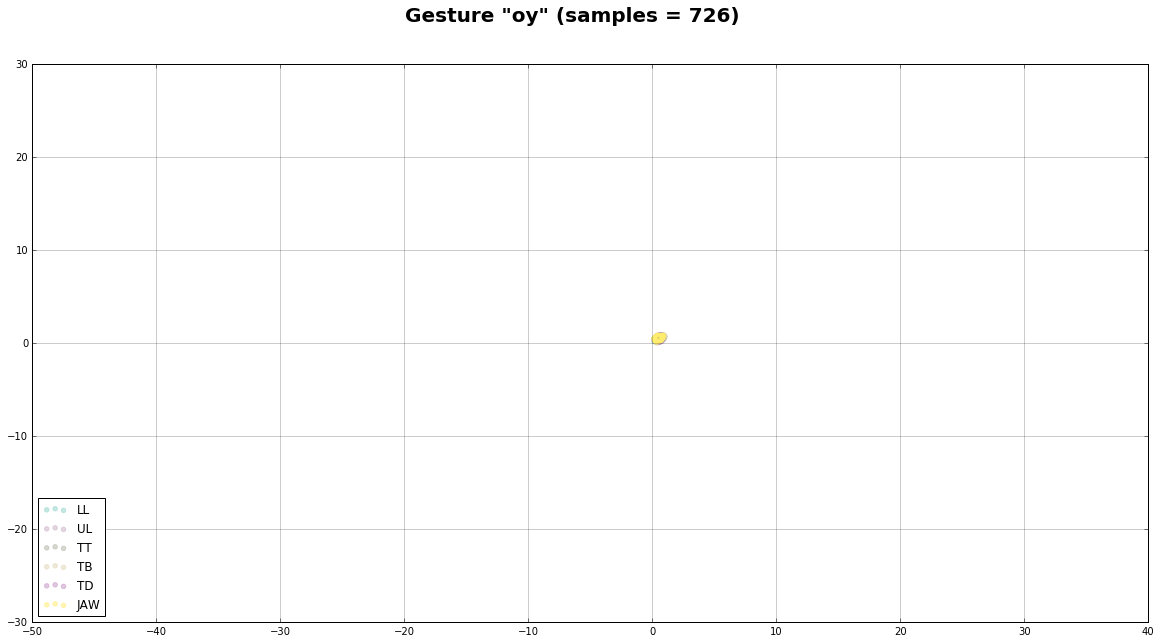

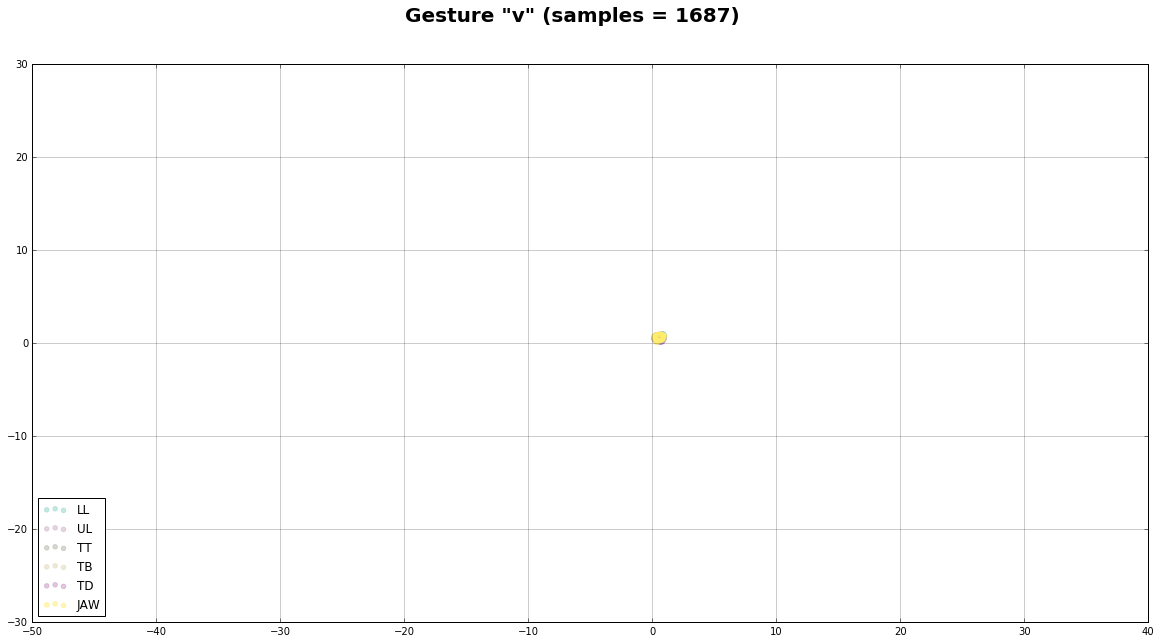

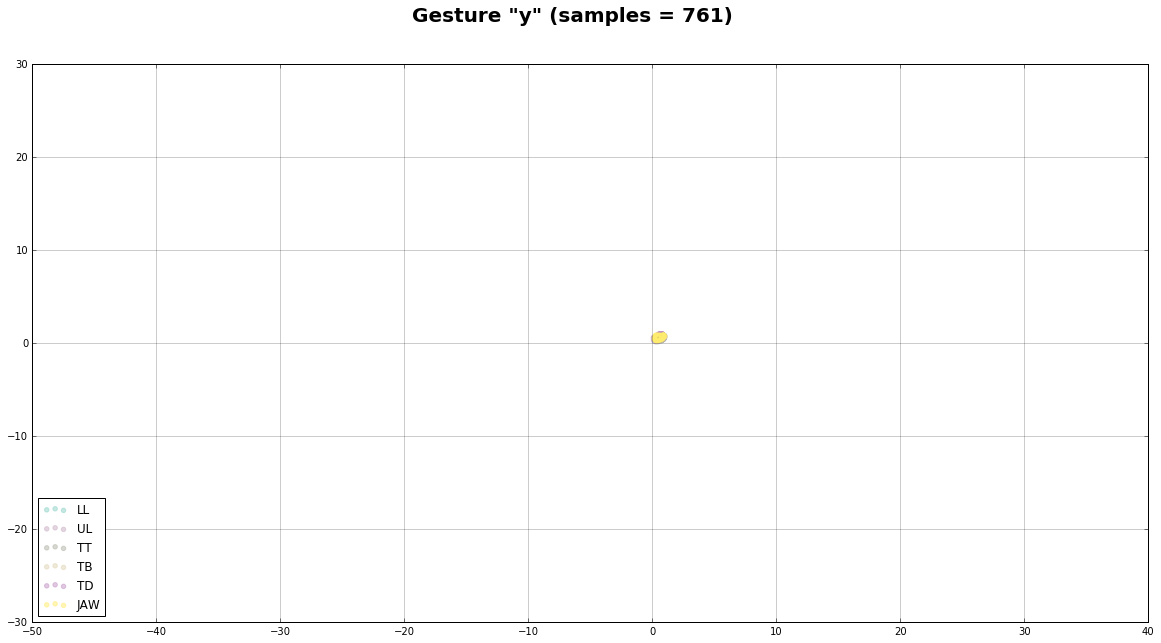

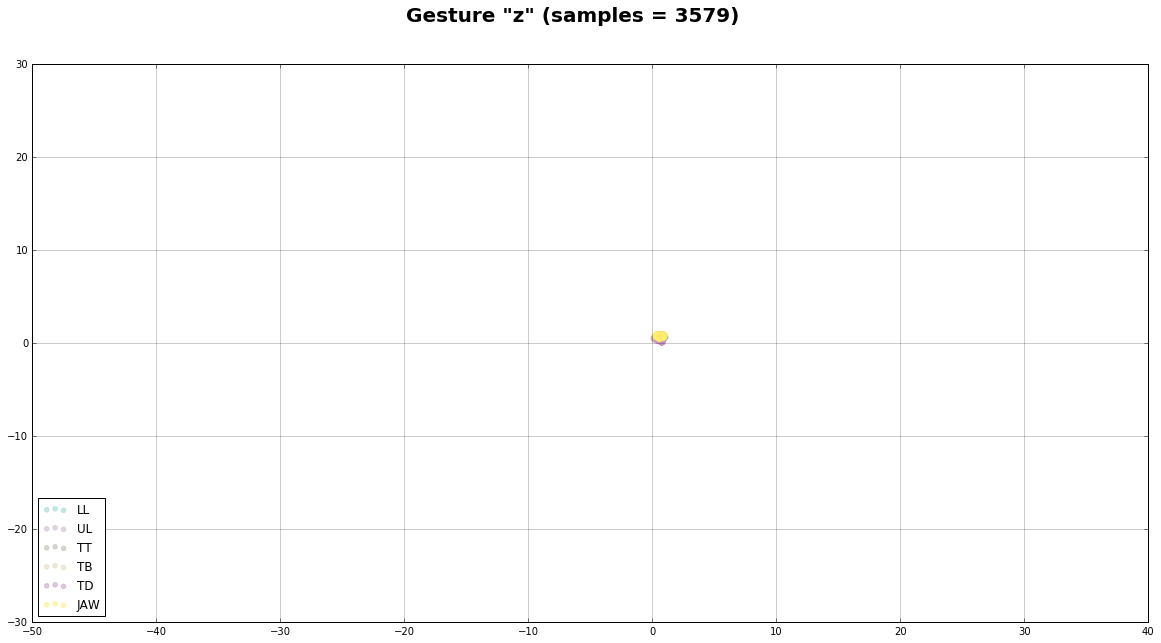

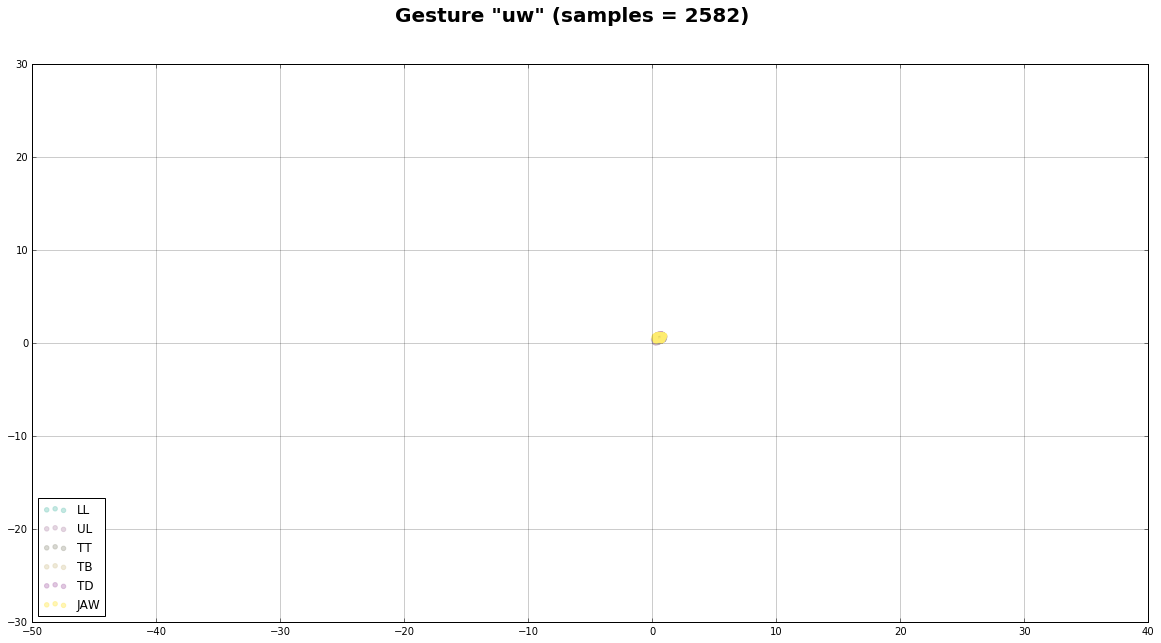

In [4]:
from matplotlib.patches import Ellipse

gestures, _, _ = tist.normalize_gestures(gestures)

articulators = ["LL", "UL", "TT", "TB", "TD", "JAW"]

cmap = plt.get_cmap('Set3')
colors = [cmap(i) for i in np.linspace(0, 1, len(articulators))]
for g_name, g in gestures.items():
    fig1, ax1 = plt.subplots(figsize=(20, 10))
    fig1.suptitle("Gesture \"{}\" (samples = {})".format(g_name, len(g.params["LL_x"])),
                  fontsize=20, fontweight='bold')
    ax1.grid(color='black', linestyle='-', linewidth=1, alpha=0.2)
#     img = plt.imread("vt_bg.jpg")
#     ax1.imshow(img, extent=[-100, 40, -70, 50], alpha=0.3)
    g_m = g.get_mean()
    g_v = g.get_variance()
    
    for i in range(len(articulators)):
        a = articulators[i]
        a_x = g.params[a+"_x"]
        a_y = g.params[a+"_y"]
        plt.subplot(range(len(articulators), i, 1)
        plt.scatter(a_x, a_y, color=colors[i], alpha=0.5, label=a)
#         plot mean ellipse
        e = Ellipse(xy=[g_m[a+"_x"], g_m[a+"_y"]],
                    width=g_v[a+"_x"]/5, height=g_v[a+"_y"]/5, alpha=0.5)
        ax1.add_artist(e)
        plt.legend(loc='lower left')
    
    plt.show()